Missing fabio module. Please install it if you need open some tiff images from the sCMOS camera
LaueToolsProjectFolder ..\lauetools\LaueTools
you are using python 3


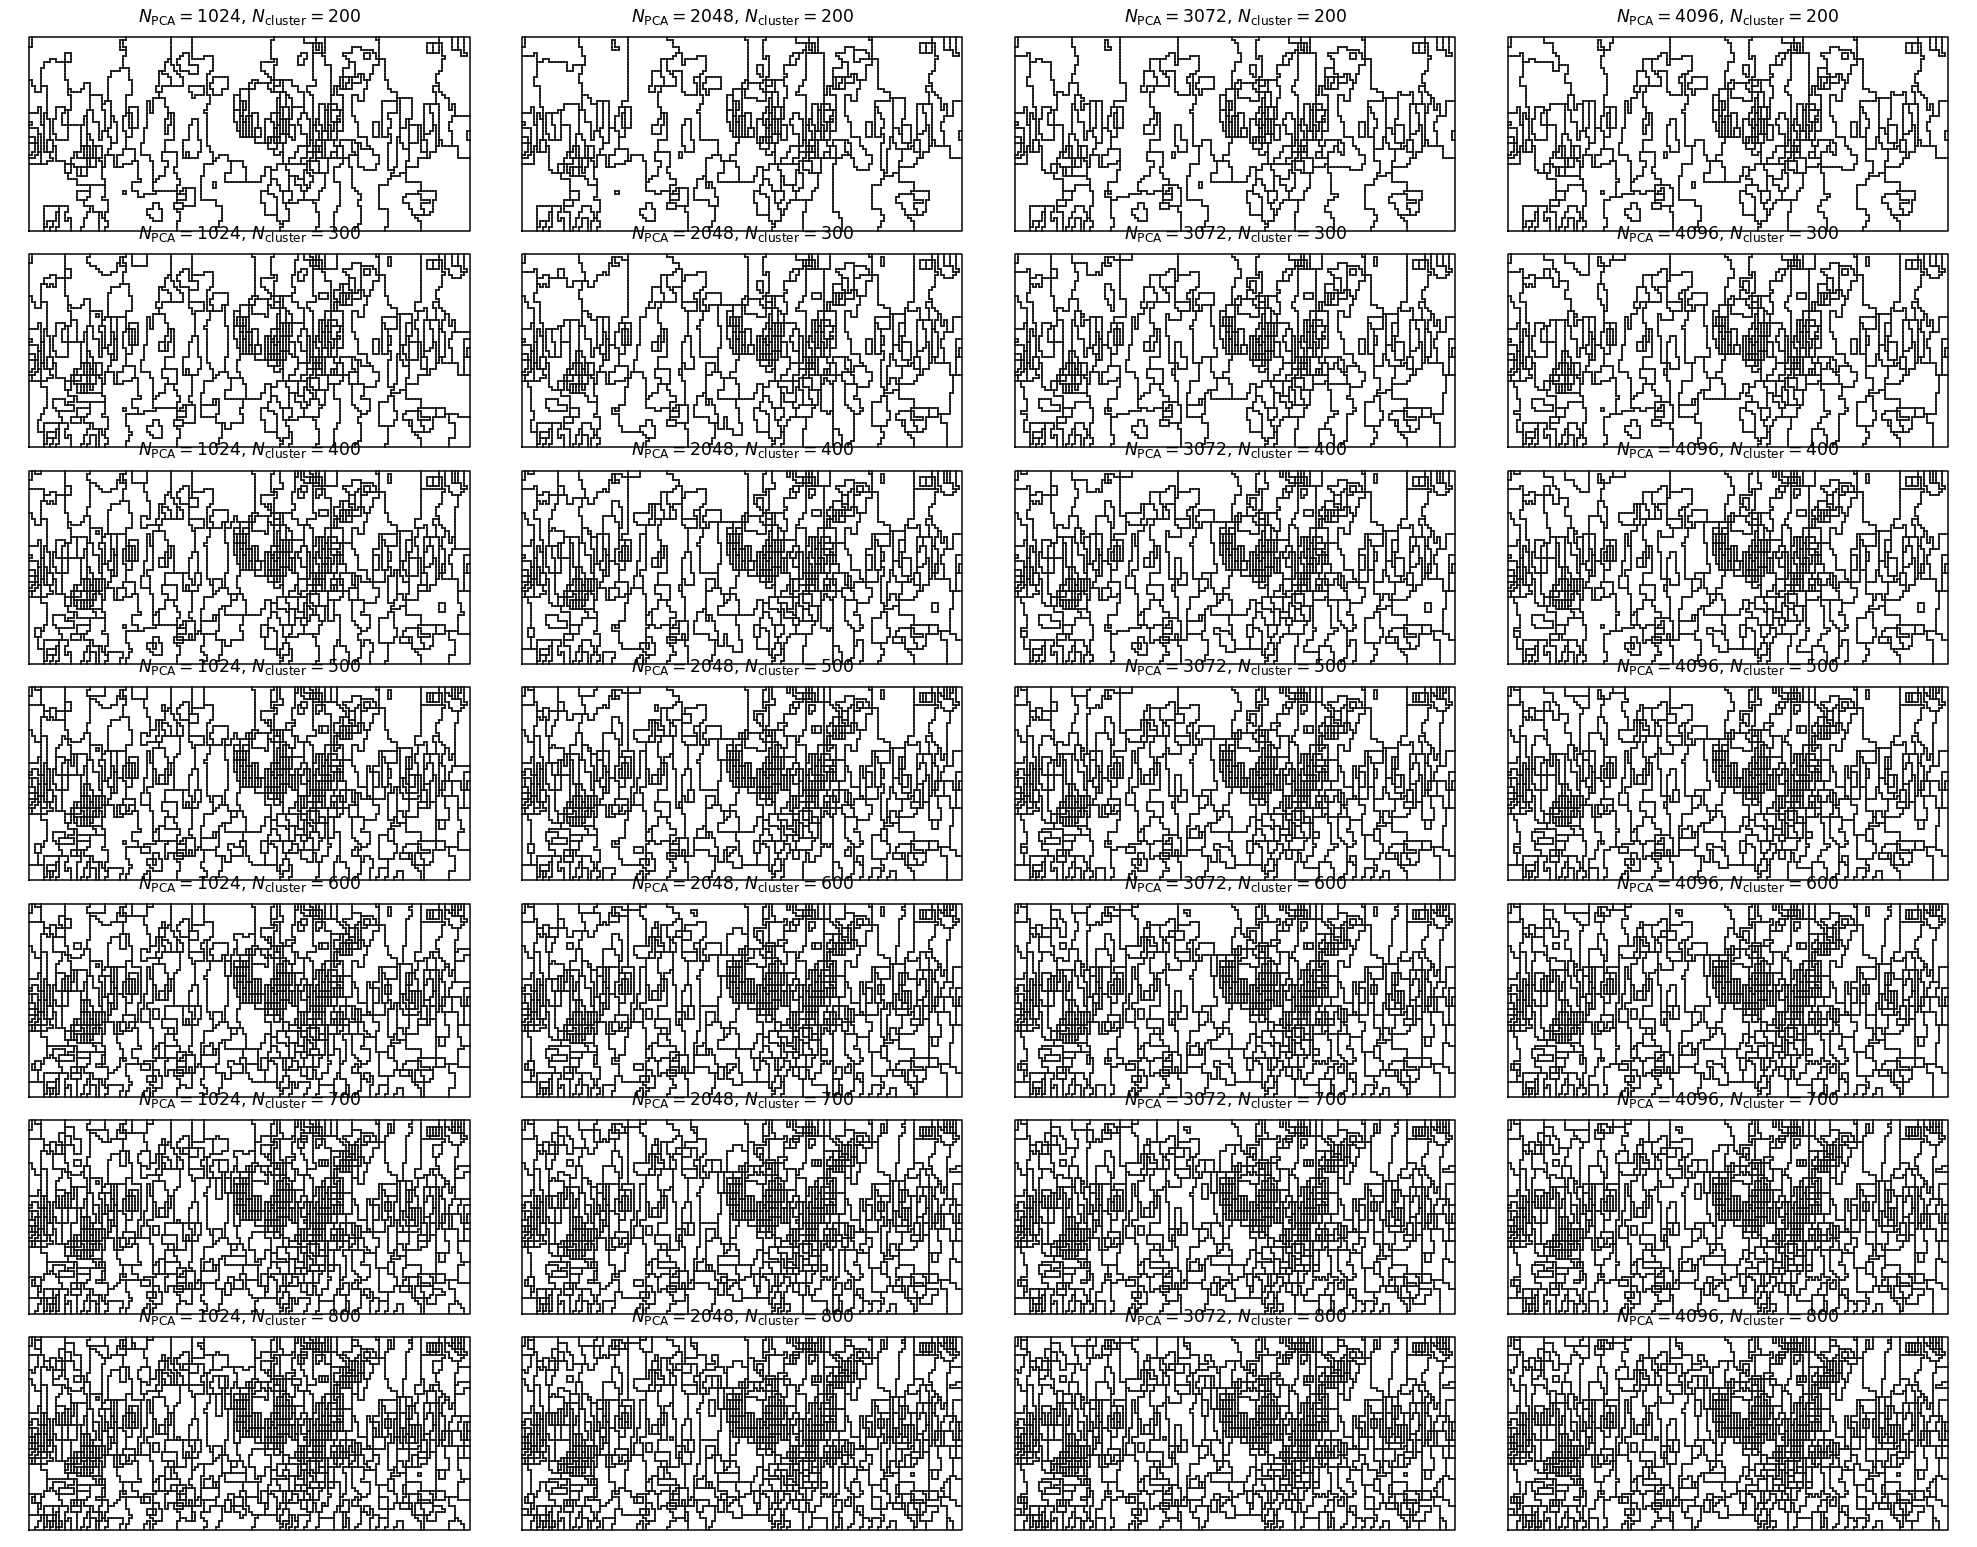

In [1]:
import sys
sys.path.append("..")
import numpy as np
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA

from scipy import fft


import lauetools.LaueTools.IOimagefile as IOimage

#from libtiff import TIFF

from sklearn import cluster
from sklearn.feature_extraction.image import grid_to_graph

from sklearn import metrics



def draw(ax,labels):
    nx,ny=labels.shape
    ax.plot([0,nx,nx,0,0],[0,0,ny,ny,0],'k')
    ax.set_aspect('equal')
    for i in range(nx):
        for j in range(ny-1):
            if labels[i,j]!=labels[i,j+1]:
                ax.plot([i,i+1],[j+1,j+1],'k')
    for i in range(nx-1):
        for j in range(ny):
            if labels[i,j]!=labels[i+1,j]:
                ax.plot([i+1,i+1],[j,j+1],'k')
    return None

#import matplotlib.gridspec as gridspec




nx,ny=64,146
ratio=ny/nx
connectivity = grid_to_graph(n_x=nx, n_y=ny)




#FA_spatial=np.load('0-64-60-124/spatial_features.npy')
FA_spatial=np.load('full_spatial_features.npy')

fig = plt.figure(constrained_layout=False,figsize=(12,12))
gs = fig.add_gridspec(nrows=7, ncols=4, left=0, right=1*ratio,bottom=0,top=7/4, wspace=0.0001,hspace=0.02)

ns_pca=(1024,2048,3072,4096)#(512,1024,2048,4096)#(64,256,1024,4096)
ns_cluster=(200,300,400,500,600,700,800)

for i in range(4):
    pca = PCA(n_components=ns_pca[i], svd_solver='full')
    pca_features=pca.fit_transform(FA_spatial)#components_
    for j in range(7):
        ward = cluster.AgglomerativeClustering(n_clusters=ns_cluster[j], connectivity=connectivity, linkage='ward', compute_full_tree=True).fit(pca_features)
        labels = ward.labels_
        labels=labels.reshape((nx,ny))
        labels=labels.T#np.flip(labels.T)
        ax=fig.add_subplot(gs[j,i])
        draw(ax,labels)
        #if j==0:
        #    ax.set_title("$n_{\mathrm{PCA}}=%i$"%ns_pca[i],fontsize='xx-large')
        #if i==0:
        #    ax.set_ylabel("$K=%i$"%ns_cluster[j],fontsize='xx-large')
        ax.axis('off')
        #ax.text(0,64,"$n_{\mathrm{PCA}}=$%i, $K=$%i"%(ns_pca[i],ns_cluster[j]),size='xx-large',verticalalignment='top',color='red')
        ax.set_title("$N_{\mathrm{PCA}}=$%i, $N_{\mathrm{cluster}}=$%i"%(ns_pca[i],ns_cluster[j]),size='xx-large')
plt.savefig('fig9_all.tif',format='tif',bbox_inches ='tight')

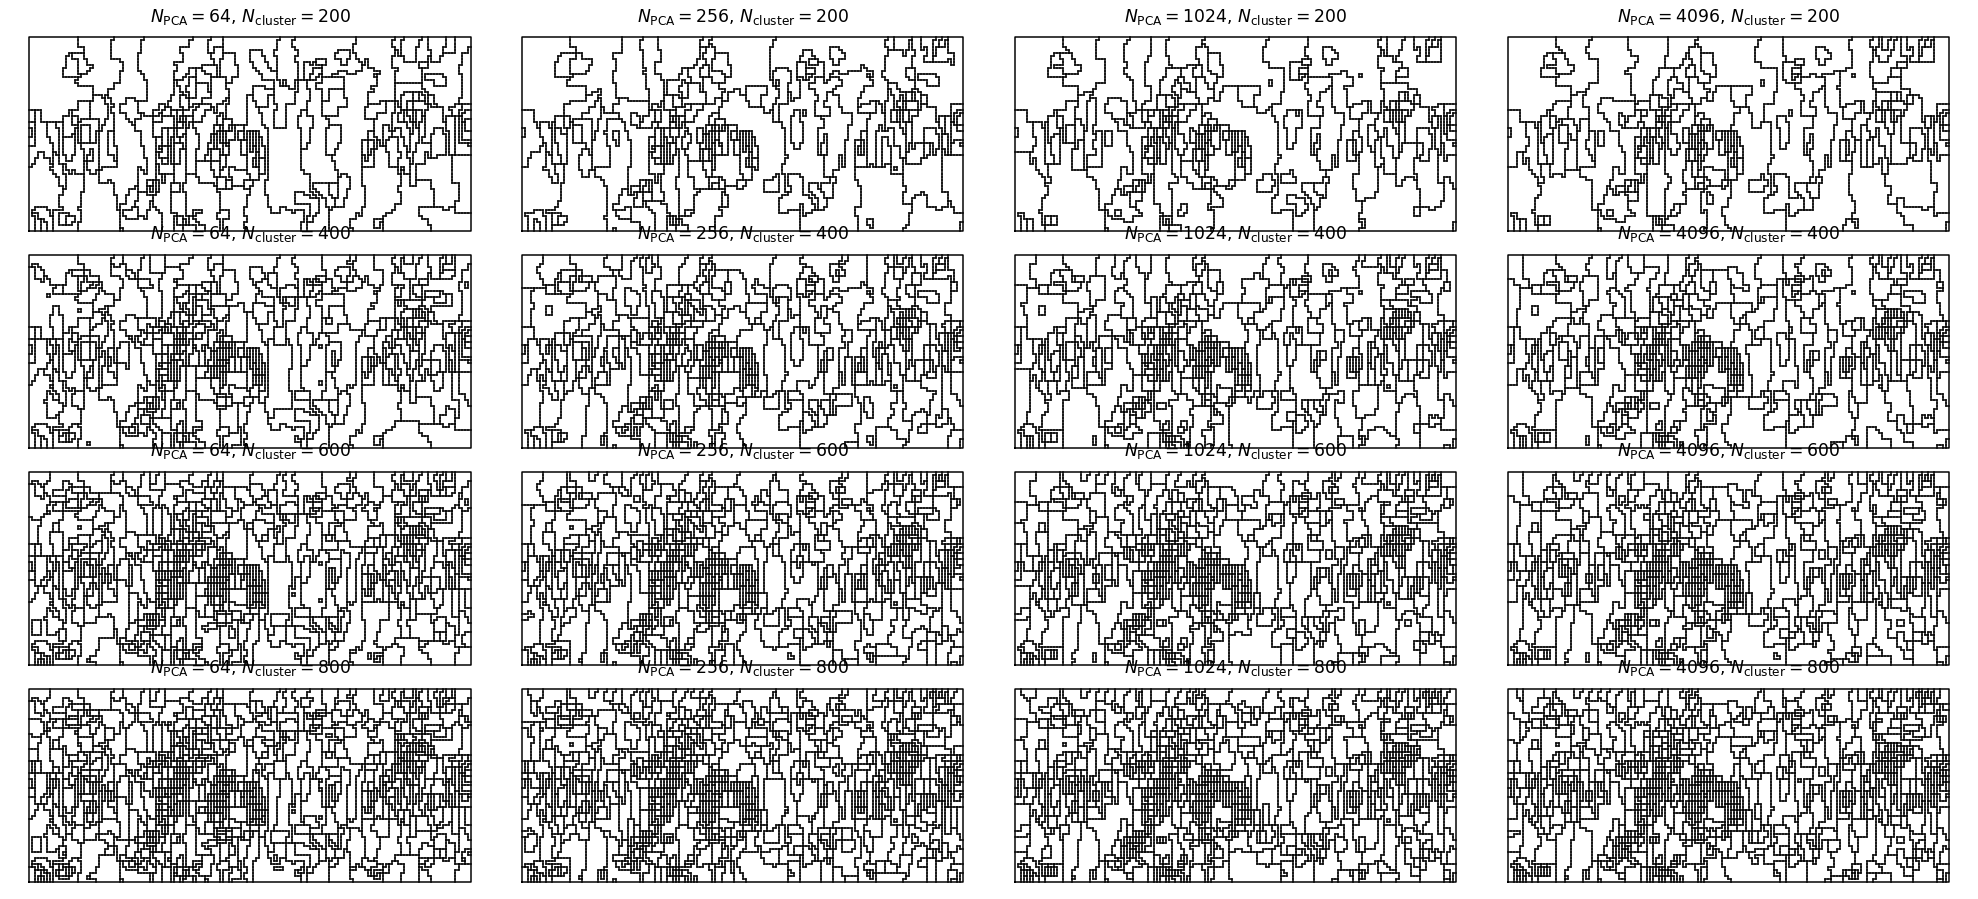

In [4]:
import sys
sys.path.append("..")
import numpy as np
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA

from scipy import fft


import lauetools.LaueTools.IOimagefile as IOimage

#from libtiff import TIFF

from sklearn import cluster
from sklearn.feature_extraction.image import grid_to_graph

from sklearn import metrics



def draw(ax,labels):
    nx,ny=labels.shape
    ax.plot([0,nx,nx,0,0],[0,0,ny,ny,0],'k')
    ax.set_aspect('equal')
    for i in range(nx):
        for j in range(ny-1):
            if labels[i,j]!=labels[i,j+1]:
                ax.plot([i,i+1],[j+1,j+1],'k')
    for i in range(nx-1):
        for j in range(ny):
            if labels[i,j]!=labels[i+1,j]:
                ax.plot([i+1,i+1],[j,j+1],'k')
    return None

#import matplotlib.gridspec as gridspec




nx,ny=64,146
ratio=ny/nx
connectivity = grid_to_graph(n_x=nx, n_y=ny)




#FA_spatial=np.load('0-64-60-124/spatial_features.npy')
FA_spatial=np.load('full_spatial_features.npy')

fig = plt.figure(constrained_layout=False,figsize=(12,12))
gs = fig.add_gridspec(nrows=4, ncols=4, left=0, right=1*ratio,bottom=0,top=1, wspace=0.0001,hspace=0.02)

ns_pca=(64,256,1024,4096)
ns_cluster=(200,400,600,800)

for i in range(4):
    pca = PCA(n_components=ns_pca[i], svd_solver='full')
    pca_features=pca.fit_transform(FA_spatial)#components_
    for j in range(4):
        ward = cluster.AgglomerativeClustering(n_clusters=ns_cluster[j], connectivity=connectivity, linkage='ward', compute_full_tree=True).fit(pca_features)
        labels = ward.labels_
        labels=labels.reshape((nx,ny))
        labels=np.flip(labels).T#np.flip(labels.T)
        ax=fig.add_subplot(gs[j,i])
        draw(ax,labels)
        #if j==0:
        #    ax.set_title("$n_{\mathrm{PCA}}=%i$"%ns_pca[i],fontsize='xx-large')
        #if i==0:
        #    ax.set_ylabel("$K=%i$"%ns_cluster[j],fontsize='xx-large')
        ax.axis('off')
        #ax.text(0,64,"$n_{\mathrm{PCA}}=$%i, $K=$%i"%(ns_pca[i],ns_cluster[j]),size='xx-large',verticalalignment='top',color='red')
        ax.set_title("$N_{\mathrm{PCA}}=$%i, $N_{\mathrm{cluster}}=$%i"%(ns_pca[i],ns_cluster[j]),size='xx-large')
plt.savefig('fig9.tif',format='tif',bbox_inches ='tight')

In [3]:
import sys
sys.path.append("..")
import numpy as np
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA

from scipy import fft


import lauetools.LaueTools.IOimagefile as IOimage

#from libtiff import TIFF

from sklearn import cluster
from sklearn.feature_extraction.image import grid_to_graph

from sklearn import metrics



def draw(ax,labels):
    nx,ny=labels.shape
    ax.plot([0,nx,nx,0,0],[0,0,ny,ny,0],'k')
    ax.set_aspect('equal')
    for i in range(nx):
        for j in range(ny-1):
            if labels[i,j]!=labels[i,j+1]:
                ax.plot([i,i+1],[j+1,j+1],'k')
    for i in range(nx-1):
        for j in range(ny):
            if labels[i,j]!=labels[i+1,j]:
                ax.plot([i+1,i+1],[j,j+1],'k')
    return None

#import matplotlib.gridspec as gridspec




nx,ny=64,146
ratio=ny/nx
connectivity = grid_to_graph(n_x=nx, n_y=ny)




#FA_spatial=np.load('0-64-60-124/spatial_features.npy')
FA_spatial=np.load('full_spatial_features.npy')

fig = plt.figure(constrained_layout=False,figsize=(12,12))
gs = fig.add_gridspec(nrows=4, ncols=4, left=0, right=1.2*ratio,bottom=0,top=1.2, wspace=0.002,hspace=0.002)

ns_pca=(512,1024,2048,4096)
ns_cluster=(100,200,300,400)

for i in range(4):
    pca = PCA(n_components=ns_pca[i], svd_solver='randomized')
    pca_features=pca.fit_transform(FA_spatial)#components_
    for j in range(4):
        ward = cluster.AgglomerativeClustering(n_clusters=ns_cluster[j], connectivity=connectivity, linkage='complete',affinity='euclidean').fit(pca_features)
        labels = ward.labels_
        labels=labels.reshape((nx,ny))
        labels=np.flip(labels.T,1)
        ax=fig.add_subplot(gs[j,i])
        draw(ax,labels)
        #if j==0:
        #    ax.set_title("$n_{\mathrm{PCA}}=%i$"%ns_pca[i],fontsize='xx-large')
        #if i==0:
        #    ax.set_ylabel("$K=%i$"%ns_cluster[j],fontsize='xx-large')
        ax.axis('off')
        ax.text(0,64,"$n_{\mathrm{PCA}}=$%i, $K=$%i"%(ns_pca[i],ns_cluster[j]),size='xx-large',verticalalignment='top',color='red')
#plt.savefig('fig9.tif',format='tif',bbox_inches ='tight')

KeyboardInterrupt: 

<Figure size 864x864 with 0 Axes>

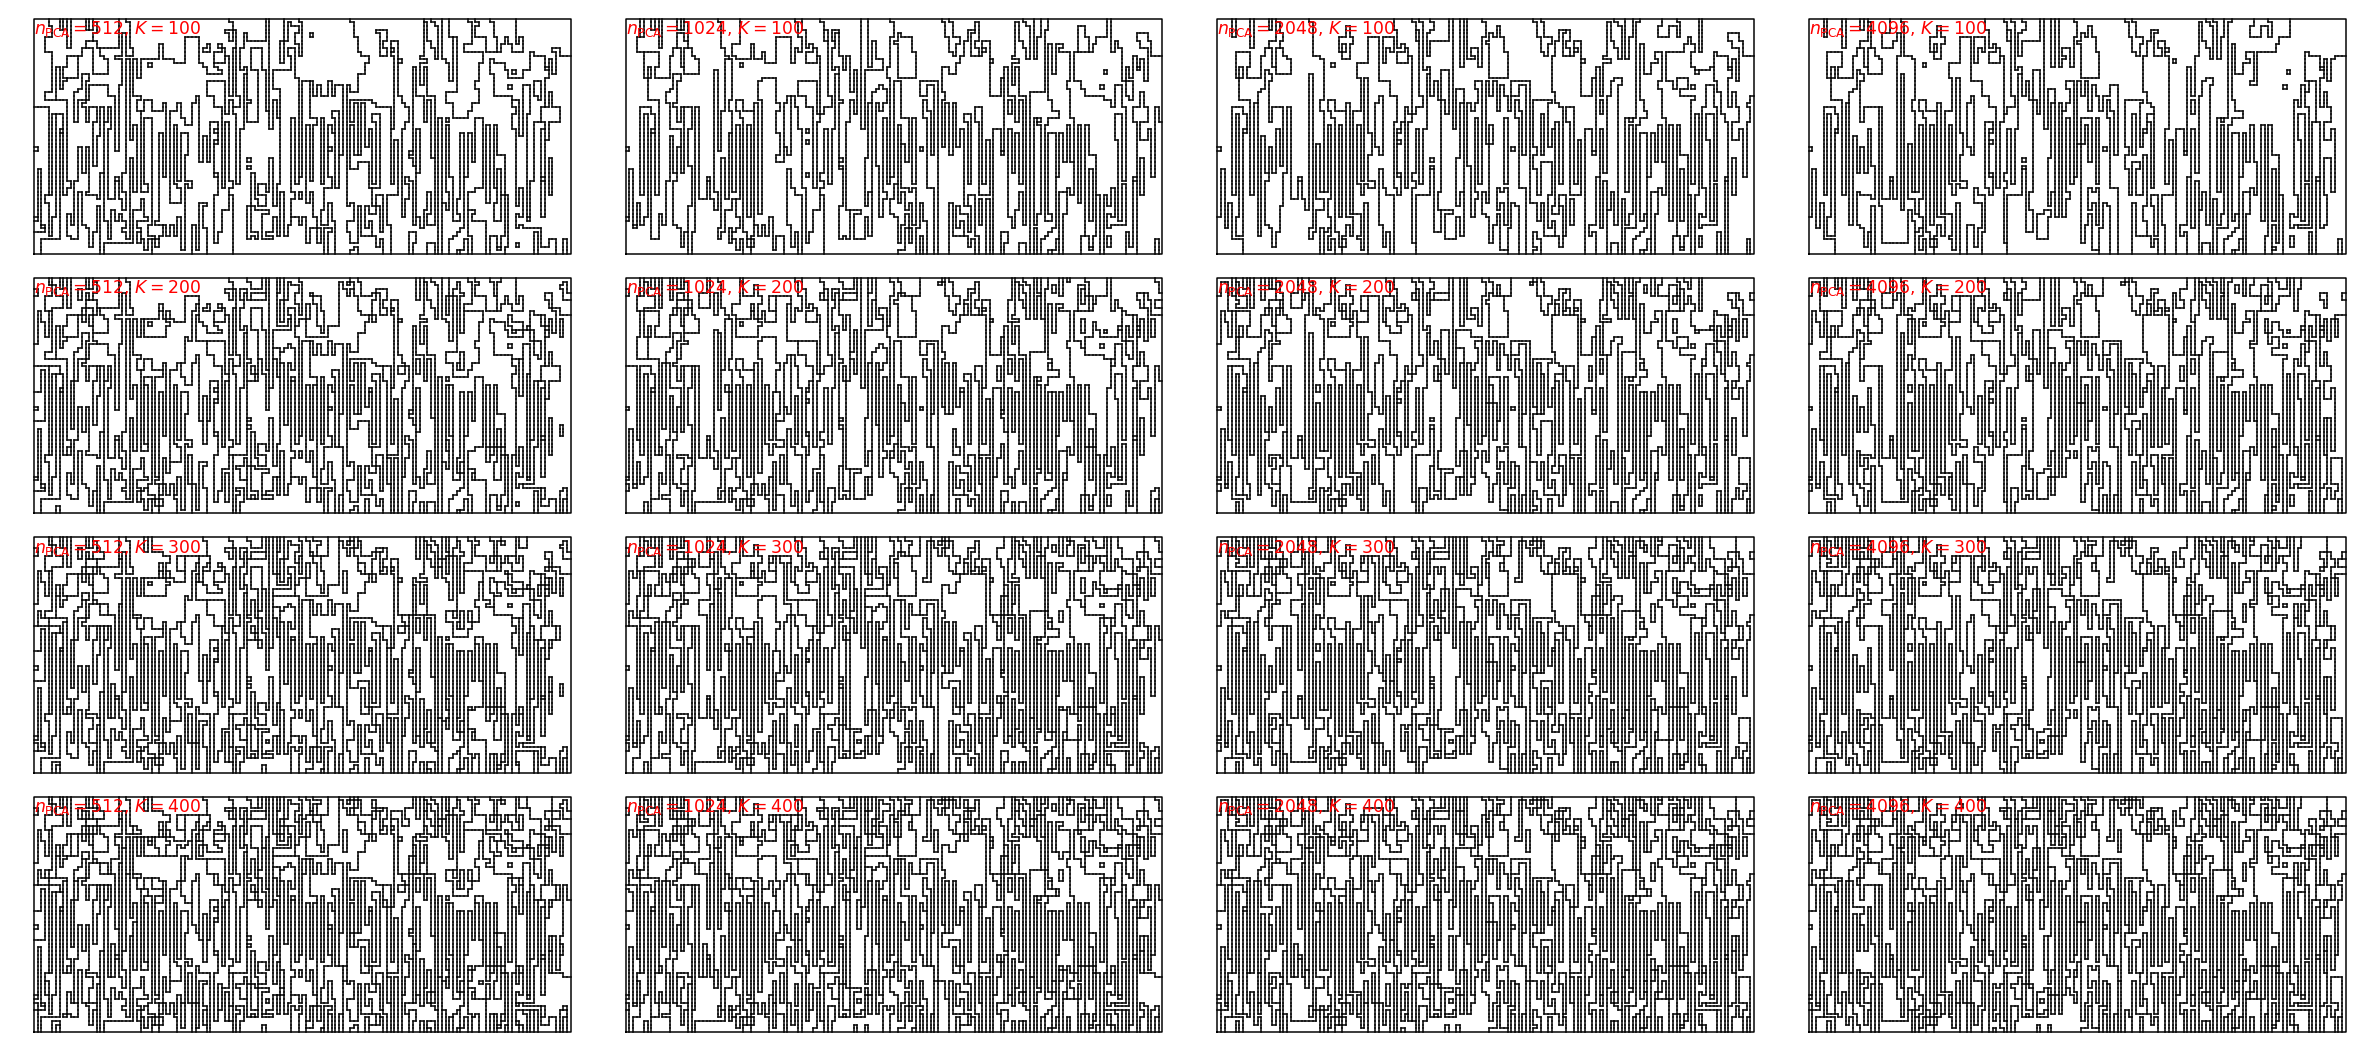

In [5]:
import sys
sys.path.append("..")
import numpy as np
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA

from scipy import fft


import lauetools.LaueTools.IOimagefile as IOimage

#from libtiff import TIFF

from sklearn import cluster
from sklearn.feature_extraction.image import grid_to_graph

from sklearn import metrics



def draw(ax,labels):
    nx,ny=labels.shape
    ax.plot([0,nx,nx,0,0],[0,0,ny,ny,0],'k')
    ax.set_aspect('equal')
    for i in range(nx):
        for j in range(ny-1):
            if labels[i,j]!=labels[i,j+1]:
                ax.plot([i,i+1],[j+1,j+1],'k')
    for i in range(nx-1):
        for j in range(ny):
            if labels[i,j]!=labels[i+1,j]:
                ax.plot([i+1,i+1],[j,j+1],'k')
    return None

#import matplotlib.gridspec as gridspec




nx,ny=64,146
ratio=ny/nx
connectivity = grid_to_graph(n_x=nx, n_y=ny)




#FA_spatial=np.load('0-64-60-124/spatial_features.npy')
FA_spatial=np.load('full_spatial_features.npy')

fig = plt.figure(constrained_layout=False,figsize=(12,12))
gs = fig.add_gridspec(nrows=4, ncols=4, left=0, right=1.2*ratio,bottom=0,top=1.2, wspace=0.002,hspace=0.002)

ns_pca=(512,1024,2048,4096)
ns_cluster=(100,200,300,400)

for i in range(4):
    pca = PCA(n_components=ns_pca[i], svd_solver='randomized')
    pca_features=pca.fit_transform(FA_spatial)#components_
    for j in range(4):
        ward = cluster.AgglomerativeClustering(n_clusters=ns_cluster[j], connectivity=connectivity, linkage='complete',affinity='cosine').fit(pca_features)
        labels = ward.labels_
        labels=labels.reshape((nx,ny))
        labels=np.flip(labels.T,1)
        ax=fig.add_subplot(gs[j,i])
        draw(ax,labels)
        #if j==0:
        #    ax.set_title("$n_{\mathrm{PCA}}=%i$"%ns_pca[i],fontsize='xx-large')
        #if i==0:
        #    ax.set_ylabel("$K=%i$"%ns_cluster[j],fontsize='xx-large')
        ax.axis('off')
        ax.text(0,64,"$n_{\mathrm{PCA}}=$%i, $K=$%i"%(ns_pca[i],ns_cluster[j]),size='xx-large',verticalalignment='top',color='red')
#plt.savefig('fig9.tif',format='tif',bbox_inches ='tight')

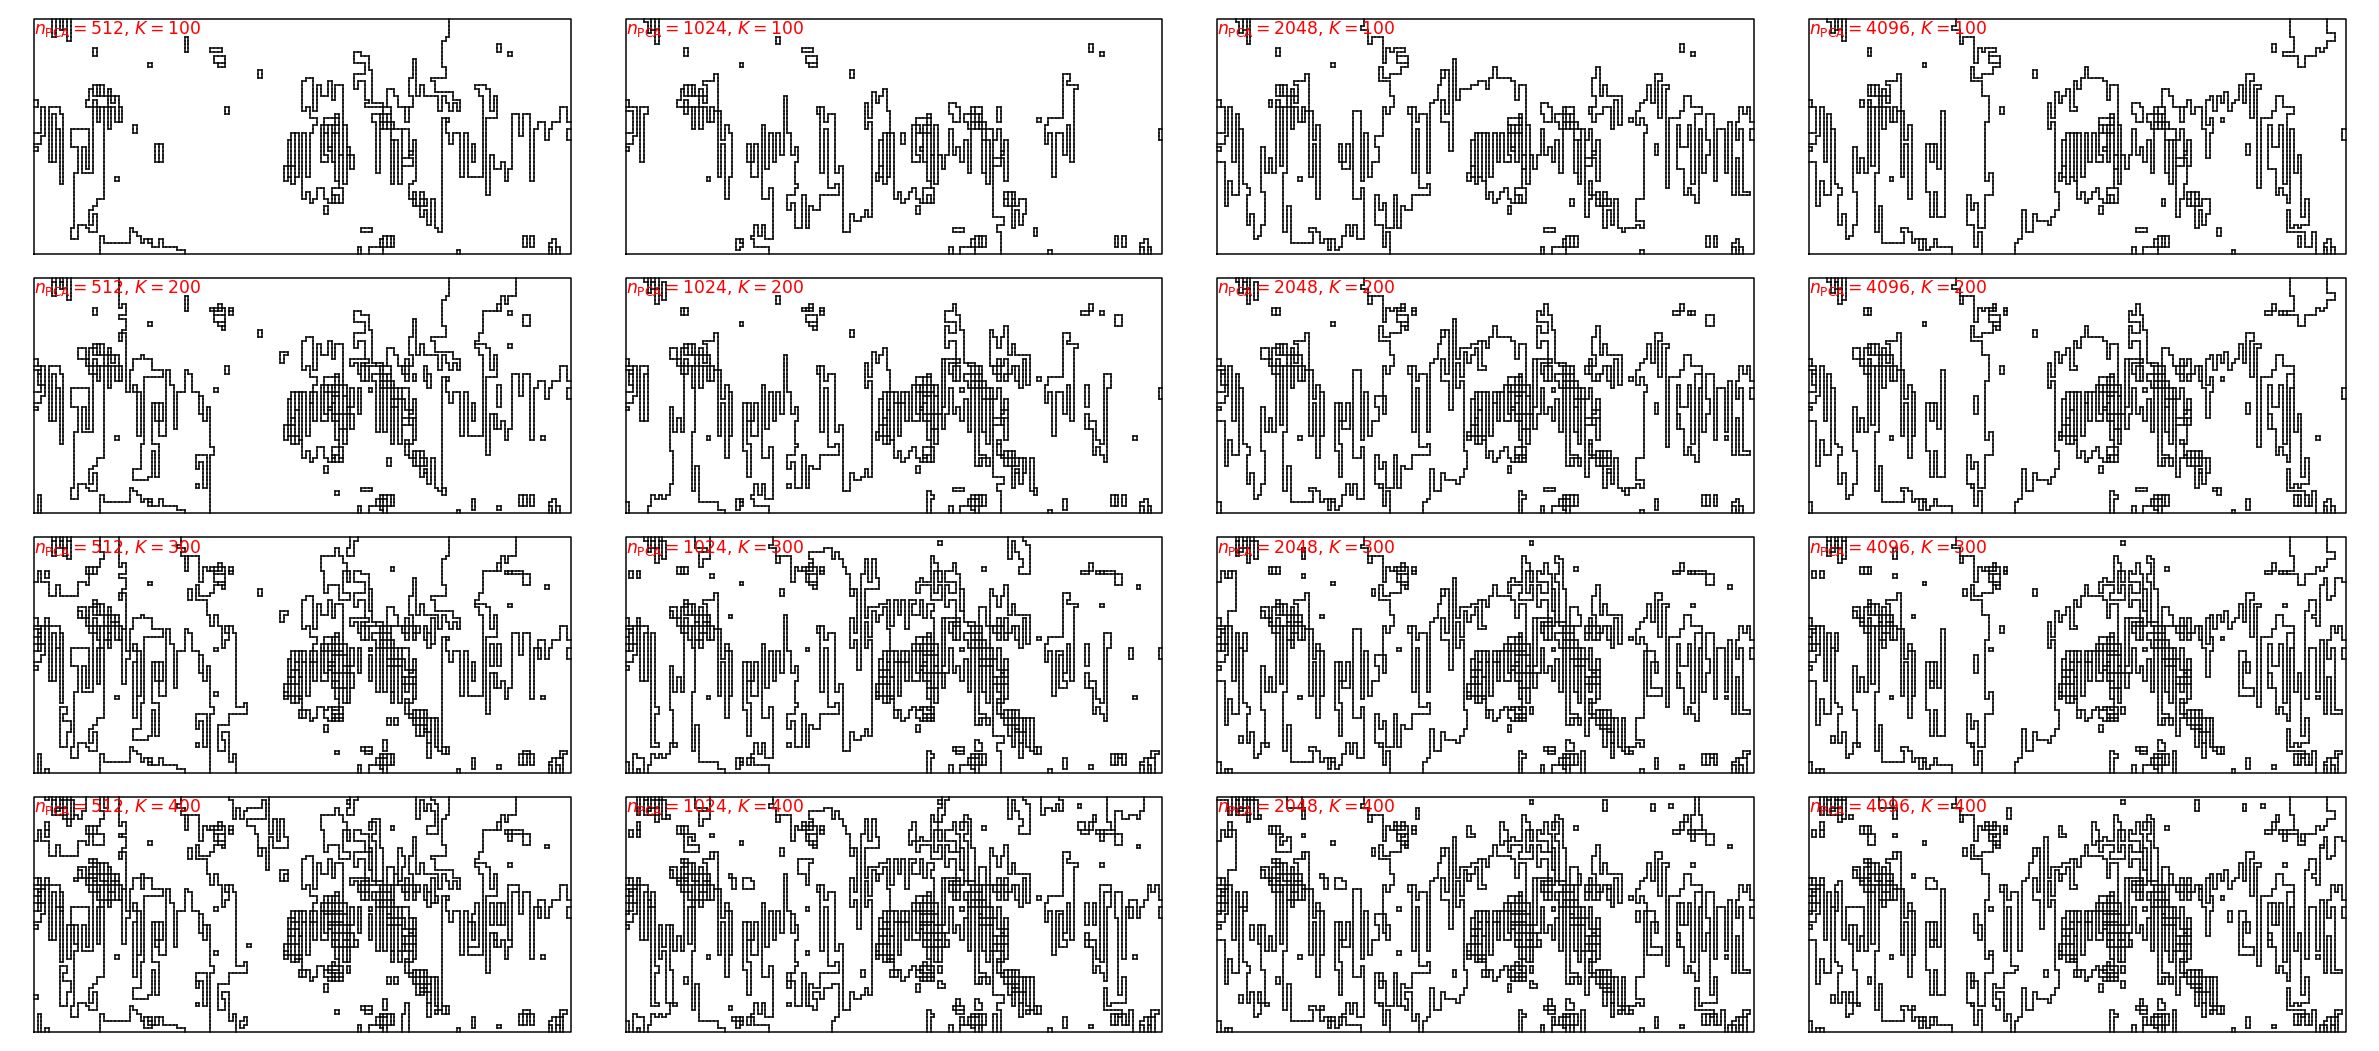

In [6]:
import sys
sys.path.append("..")
import numpy as np
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA

from scipy import fft


import lauetools.LaueTools.IOimagefile as IOimage

#from libtiff import TIFF

from sklearn import cluster
from sklearn.feature_extraction.image import grid_to_graph

from sklearn import metrics



def draw(ax,labels):
    nx,ny=labels.shape
    ax.plot([0,nx,nx,0,0],[0,0,ny,ny,0],'k')
    ax.set_aspect('equal')
    for i in range(nx):
        for j in range(ny-1):
            if labels[i,j]!=labels[i,j+1]:
                ax.plot([i,i+1],[j+1,j+1],'k')
    for i in range(nx-1):
        for j in range(ny):
            if labels[i,j]!=labels[i+1,j]:
                ax.plot([i+1,i+1],[j,j+1],'k')
    return None

#import matplotlib.gridspec as gridspec




nx,ny=64,146
ratio=ny/nx
connectivity = grid_to_graph(n_x=nx, n_y=ny)




#FA_spatial=np.load('0-64-60-124/spatial_features.npy')
FA_spatial=np.load('full_spatial_features.npy')

fig = plt.figure(constrained_layout=False,figsize=(12,12))
gs = fig.add_gridspec(nrows=4, ncols=4, left=0, right=1.2*ratio,bottom=0,top=1.2, wspace=0.002,hspace=0.002)

ns_pca=(512,1024,2048,4096)
ns_cluster=(100,200,300,400)

for i in range(4):
    pca = PCA(n_components=ns_pca[i], svd_solver='randomized')
    pca_features=pca.fit_transform(FA_spatial)#components_
    for j in range(4):
        ward = cluster.AgglomerativeClustering(n_clusters=ns_cluster[j], connectivity=connectivity, linkage='complete',affinity='l2').fit(pca_features)
        labels = ward.labels_
        labels=labels.reshape((nx,ny))
        labels=np.flip(labels.T,1)
        ax=fig.add_subplot(gs[j,i])
        draw(ax,labels)
        #if j==0:
        #    ax.set_title("$n_{\mathrm{PCA}}=%i$"%ns_pca[i],fontsize='xx-large')
        #if i==0:
        #    ax.set_ylabel("$K=%i$"%ns_cluster[j],fontsize='xx-large')
        ax.axis('off')
        ax.text(0,64,"$n_{\mathrm{PCA}}=$%i, $K=$%i"%(ns_pca[i],ns_cluster[j]),size='xx-large',verticalalignment='top',color='red')
#plt.savefig('fig9.tif',format='tif',bbox_inches ='tight')

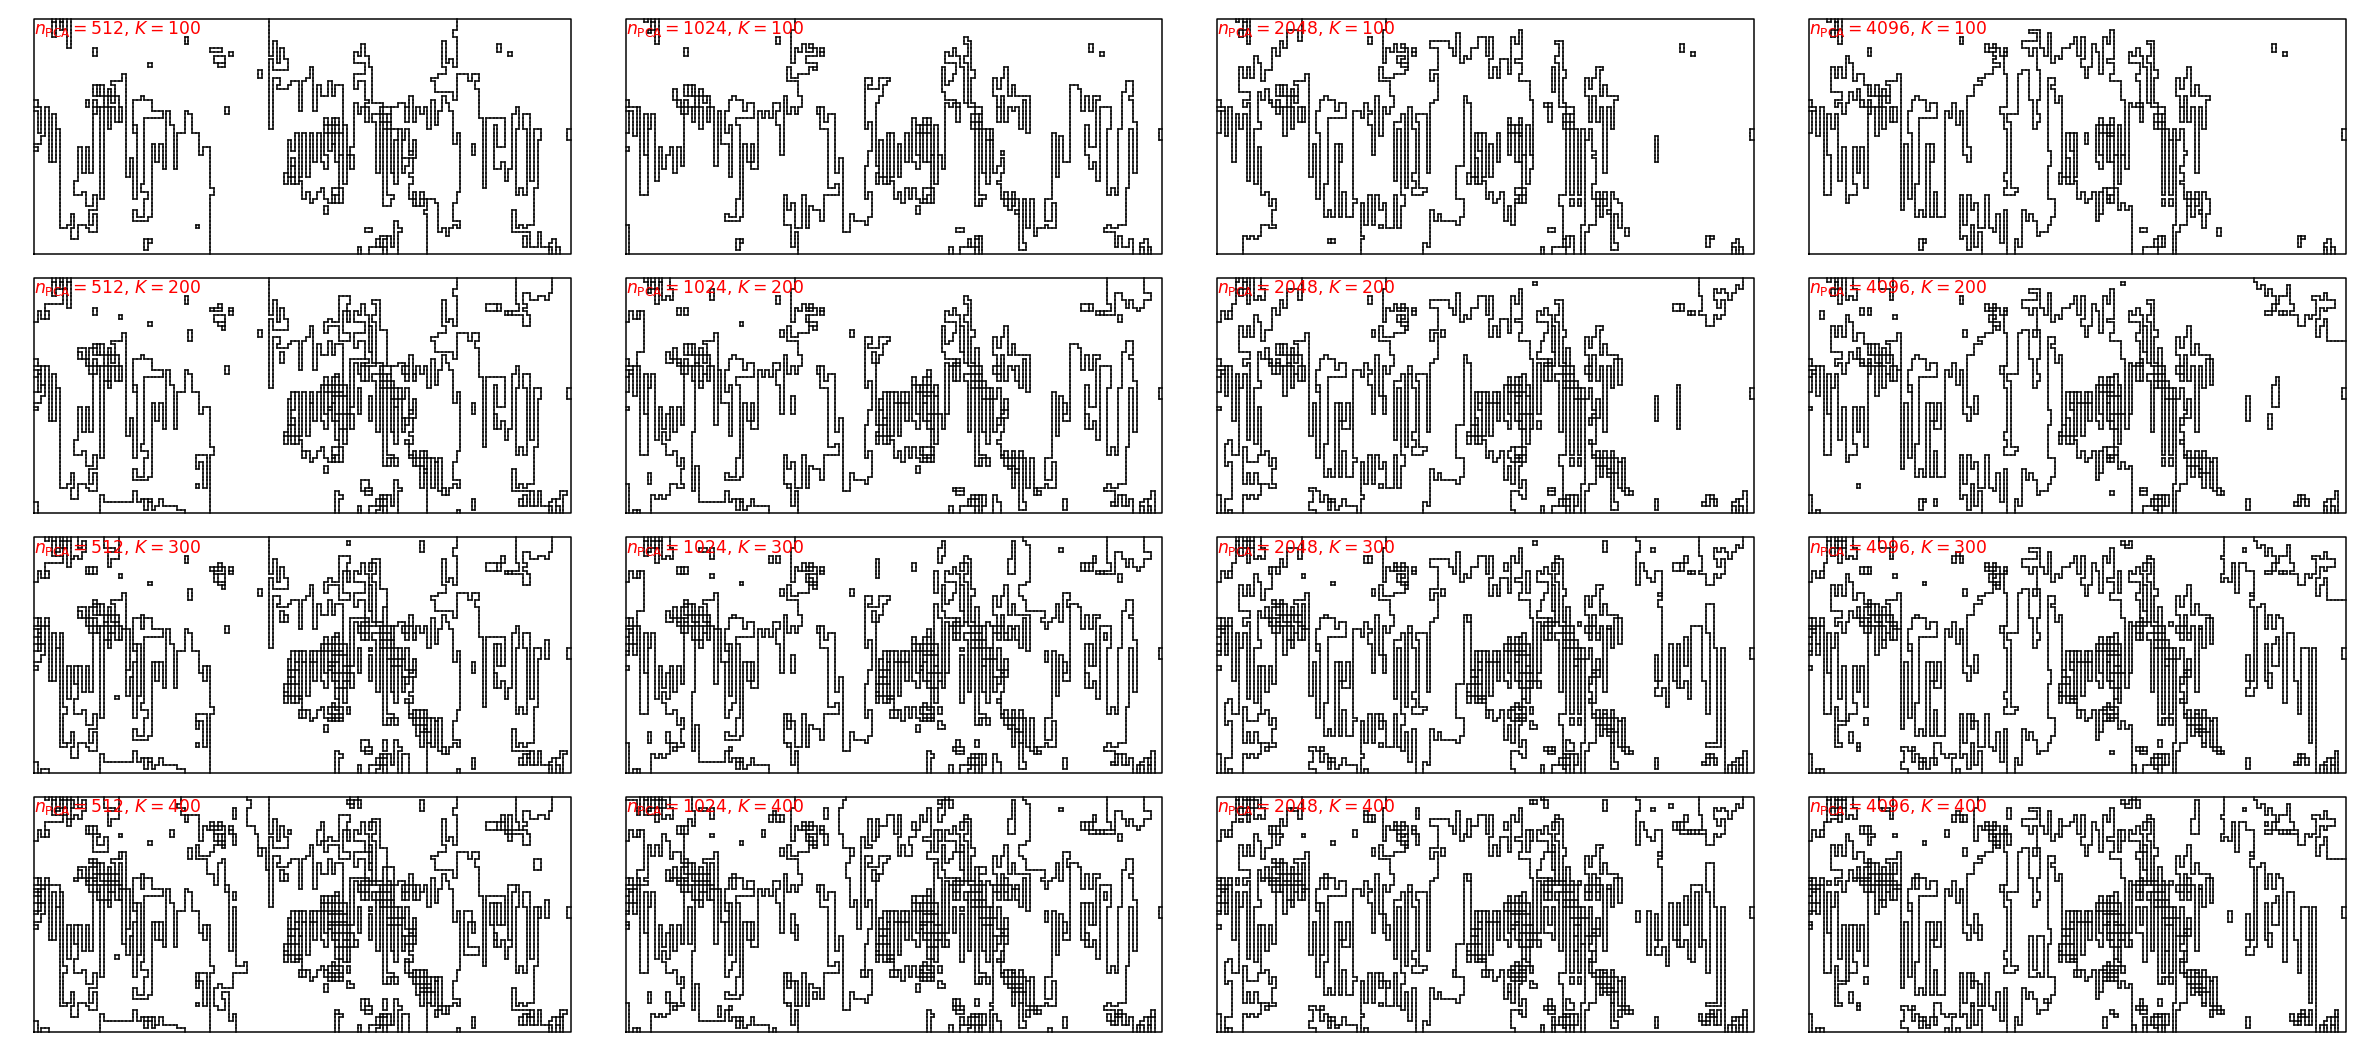

In [7]:
import sys
sys.path.append("..")
import numpy as np
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA

from scipy import fft


import lauetools.LaueTools.IOimagefile as IOimage

#from libtiff import TIFF

from sklearn import cluster
from sklearn.feature_extraction.image import grid_to_graph

from sklearn import metrics



def draw(ax,labels):
    nx,ny=labels.shape
    ax.plot([0,nx,nx,0,0],[0,0,ny,ny,0],'k')
    ax.set_aspect('equal')
    for i in range(nx):
        for j in range(ny-1):
            if labels[i,j]!=labels[i,j+1]:
                ax.plot([i,i+1],[j+1,j+1],'k')
    for i in range(nx-1):
        for j in range(ny):
            if labels[i,j]!=labels[i+1,j]:
                ax.plot([i+1,i+1],[j,j+1],'k')
    return None

#import matplotlib.gridspec as gridspec




nx,ny=64,146
ratio=ny/nx
connectivity = grid_to_graph(n_x=nx, n_y=ny)




#FA_spatial=np.load('0-64-60-124/spatial_features.npy')
FA_spatial=np.load('full_spatial_features.npy')

fig = plt.figure(constrained_layout=False,figsize=(12,12))
gs = fig.add_gridspec(nrows=4, ncols=4, left=0, right=1.2*ratio,bottom=0,top=1.2, wspace=0.002,hspace=0.002)

ns_pca=(512,1024,2048,4096)
ns_cluster=(100,200,300,400)

for i in range(4):
    pca = PCA(n_components=ns_pca[i], svd_solver='randomized')
    pca_features=pca.fit_transform(FA_spatial)#components_
    for j in range(4):
        ward = cluster.AgglomerativeClustering(n_clusters=ns_cluster[j], connectivity=connectivity, linkage='complete',affinity='l1').fit(pca_features)
        labels = ward.labels_
        labels=labels.reshape((nx,ny))
        labels=np.flip(labels.T,1)
        ax=fig.add_subplot(gs[j,i])
        draw(ax,labels)
        #if j==0:
        #    ax.set_title("$n_{\mathrm{PCA}}=%i$"%ns_pca[i],fontsize='xx-large')
        #if i==0:
        #    ax.set_ylabel("$K=%i$"%ns_cluster[j],fontsize='xx-large')
        ax.axis('off')
        ax.text(0,64,"$n_{\mathrm{PCA}}=$%i, $K=$%i"%(ns_pca[i],ns_cluster[j]),size='xx-large',verticalalignment='top',color='red')
#plt.savefig('fig9.tif',format='tif',bbox_inches ='tight')

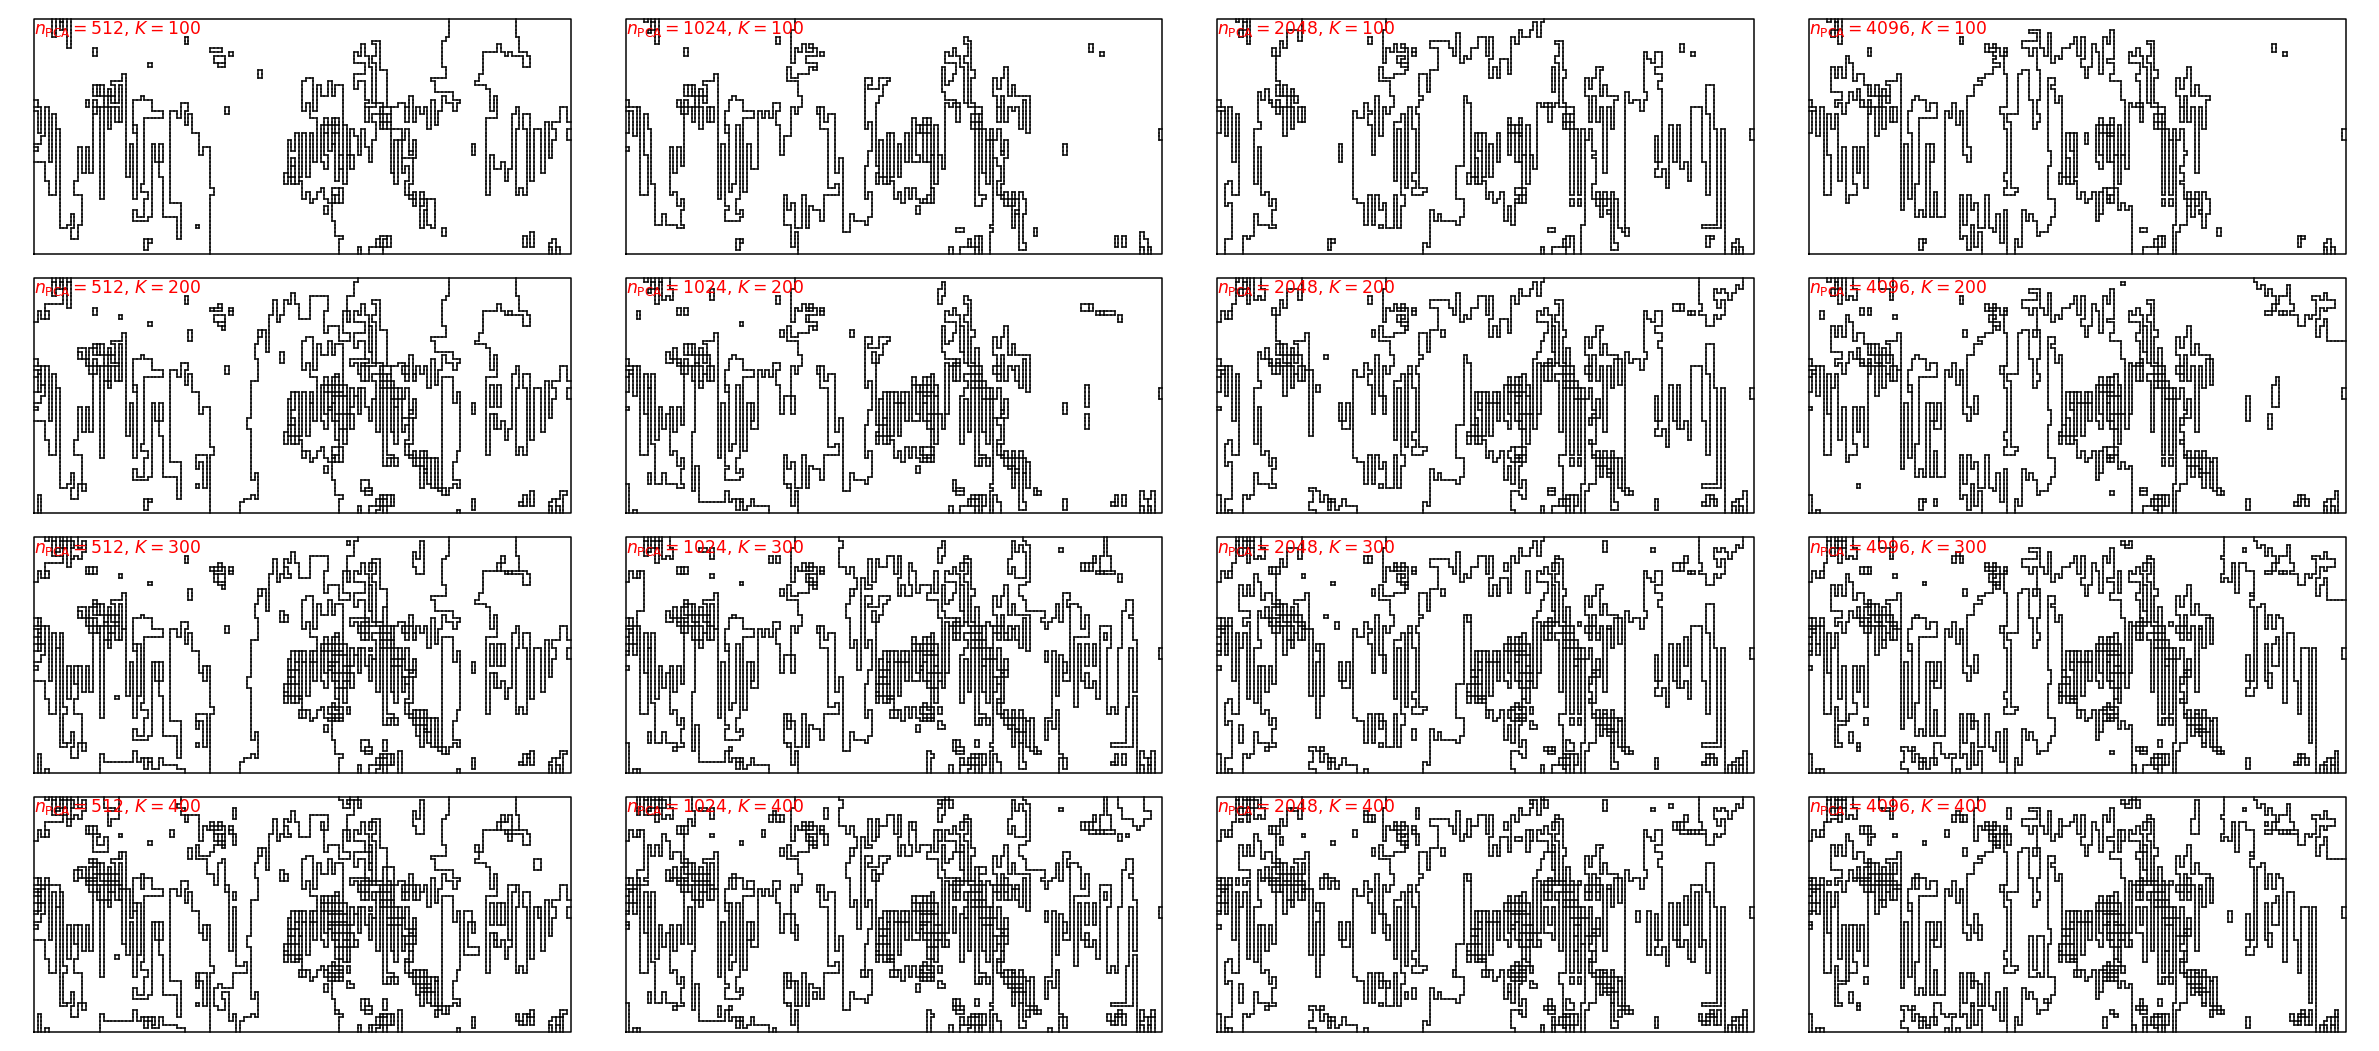

In [18]:
import sys
sys.path.append("..")
import numpy as np
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA

from scipy import fft


import lauetools.LaueTools.IOimagefile as IOimage

#from libtiff import TIFF

from sklearn import cluster
from sklearn.feature_extraction.image import grid_to_graph

from sklearn import metrics



def draw(ax,labels):
    nx,ny=labels.shape
    ax.plot([0,nx,nx,0,0],[0,0,ny,ny,0],'k')
    ax.set_aspect('equal')
    for i in range(nx):
        for j in range(ny-1):
            if labels[i,j]!=labels[i,j+1]:
                ax.plot([i,i+1],[j+1,j+1],'k')
    for i in range(nx-1):
        for j in range(ny):
            if labels[i,j]!=labels[i+1,j]:
                ax.plot([i+1,i+1],[j,j+1],'k')
    return None

#import matplotlib.gridspec as gridspec




nx,ny=64,146
ratio=ny/nx
connectivity = grid_to_graph(n_x=nx, n_y=ny)




#FA_spatial=np.load('0-64-60-124/spatial_features.npy')
FA_spatial=np.load('full_spatial_features.npy')

fig = plt.figure(constrained_layout=False,figsize=(12,12))
gs = fig.add_gridspec(nrows=4, ncols=4, left=0, right=1.2*ratio,bottom=0,top=1.2, wspace=0.002,hspace=0.002)

ns_pca=(512,1024,2048,4096)
ns_cluster=(100,200,300,400)

for i in range(4):
    pca = PCA(n_components=ns_pca[i], svd_solver='randomized')
    pca_features=pca.fit_transform(FA_spatial)#components_
    for j in range(4):
        ward = cluster.AgglomerativeClustering(n_clusters=ns_cluster[j], connectivity=connectivity, linkage='complete',affinity='manhattan').fit(pca_features)
        labels = ward.labels_
        labels=labels.reshape((nx,ny))
        labels=np.flip(labels.T,1)
        ax=fig.add_subplot(gs[j,i])
        draw(ax,labels)
        #if j==0:
        #    ax.set_title("$n_{\mathrm{PCA}}=%i$"%ns_pca[i],fontsize='xx-large')
        #if i==0:
        #    ax.set_ylabel("$K=%i$"%ns_cluster[j],fontsize='xx-large')
        ax.axis('off')
        ax.text(0,64,"$n_{\mathrm{PCA}}=$%i, $K=$%i"%(ns_pca[i],ns_cluster[j]),size='xx-large',verticalalignment='top',color='red')
#plt.savefig('fig9.tif',format='tif',bbox_inches ='tight')

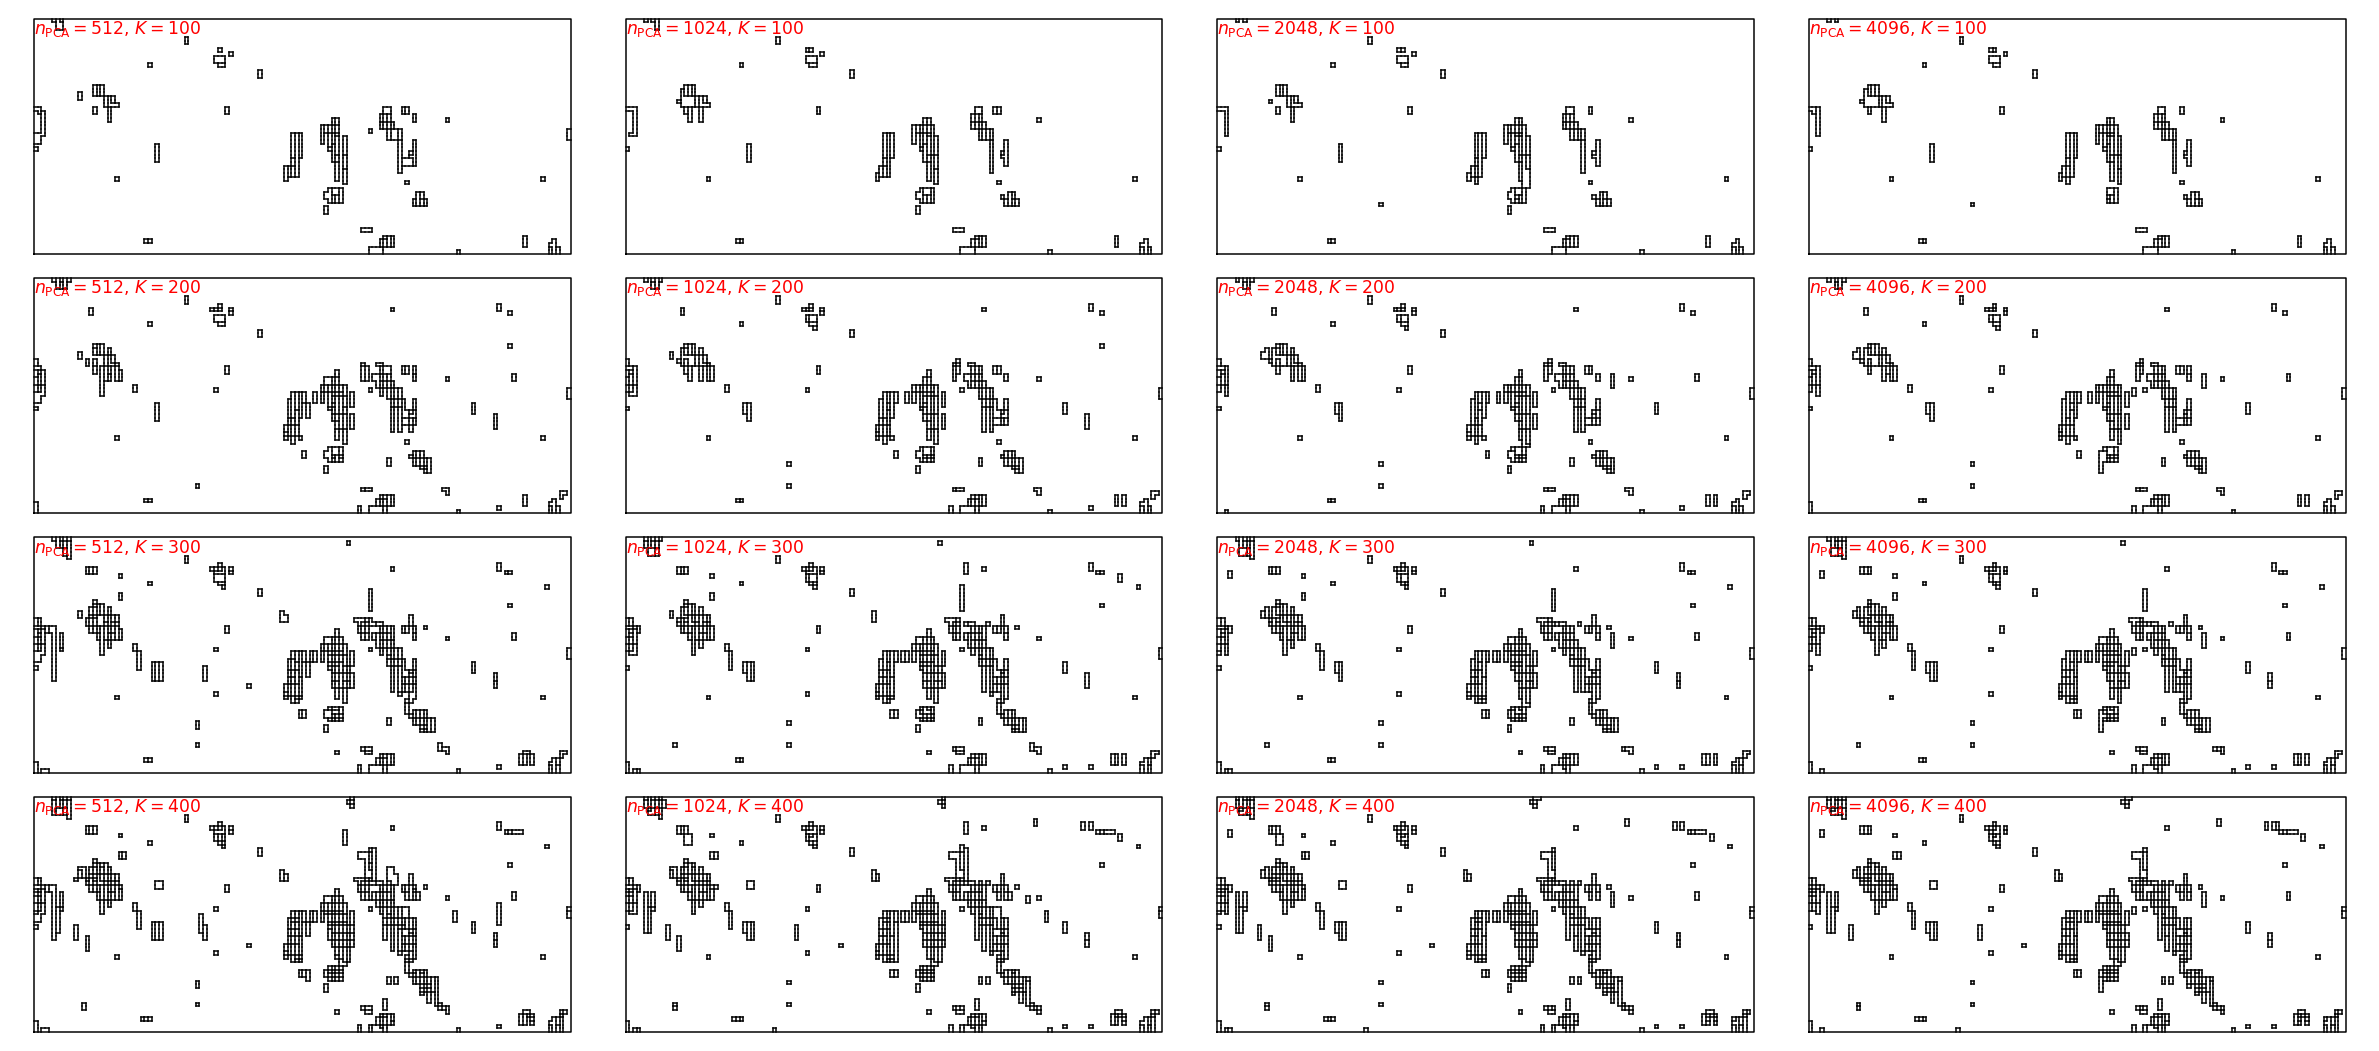

In [8]:
import sys
sys.path.append("..")
import numpy as np
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA

from scipy import fft


import lauetools.LaueTools.IOimagefile as IOimage

#from libtiff import TIFF

from sklearn import cluster
from sklearn.feature_extraction.image import grid_to_graph

from sklearn import metrics



def draw(ax,labels):
    nx,ny=labels.shape
    ax.plot([0,nx,nx,0,0],[0,0,ny,ny,0],'k')
    ax.set_aspect('equal')
    for i in range(nx):
        for j in range(ny-1):
            if labels[i,j]!=labels[i,j+1]:
                ax.plot([i,i+1],[j+1,j+1],'k')
    for i in range(nx-1):
        for j in range(ny):
            if labels[i,j]!=labels[i+1,j]:
                ax.plot([i+1,i+1],[j,j+1],'k')
    return None

#import matplotlib.gridspec as gridspec




nx,ny=64,146
ratio=ny/nx
connectivity = grid_to_graph(n_x=nx, n_y=ny)




#FA_spatial=np.load('0-64-60-124/spatial_features.npy')
FA_spatial=np.load('full_spatial_features.npy')

fig = plt.figure(constrained_layout=False,figsize=(12,12))
gs = fig.add_gridspec(nrows=4, ncols=4, left=0, right=1.2*ratio,bottom=0,top=1.2, wspace=0.002,hspace=0.002)

ns_pca=(512,1024,2048,4096)
ns_cluster=(100,200,300,400)

for i in range(4):
    pca = PCA(n_components=ns_pca[i], svd_solver='randomized')
    pca_features=pca.fit_transform(FA_spatial)#components_
    for j in range(4):
        ward = cluster.AgglomerativeClustering(n_clusters=ns_cluster[j], connectivity=connectivity, linkage='average',affinity='euclidean').fit(pca_features)
        labels = ward.labels_
        labels=labels.reshape((nx,ny))
        labels=np.flip(labels.T,1)
        ax=fig.add_subplot(gs[j,i])
        draw(ax,labels)
        #if j==0:
        #    ax.set_title("$n_{\mathrm{PCA}}=%i$"%ns_pca[i],fontsize='xx-large')
        #if i==0:
        #    ax.set_ylabel("$K=%i$"%ns_cluster[j],fontsize='xx-large')
        ax.axis('off')
        ax.text(0,64,"$n_{\mathrm{PCA}}=$%i, $K=$%i"%(ns_pca[i],ns_cluster[j]),size='xx-large',verticalalignment='top',color='red')
#plt.savefig('fig9.tif',format='tif',bbox_inches ='tight')

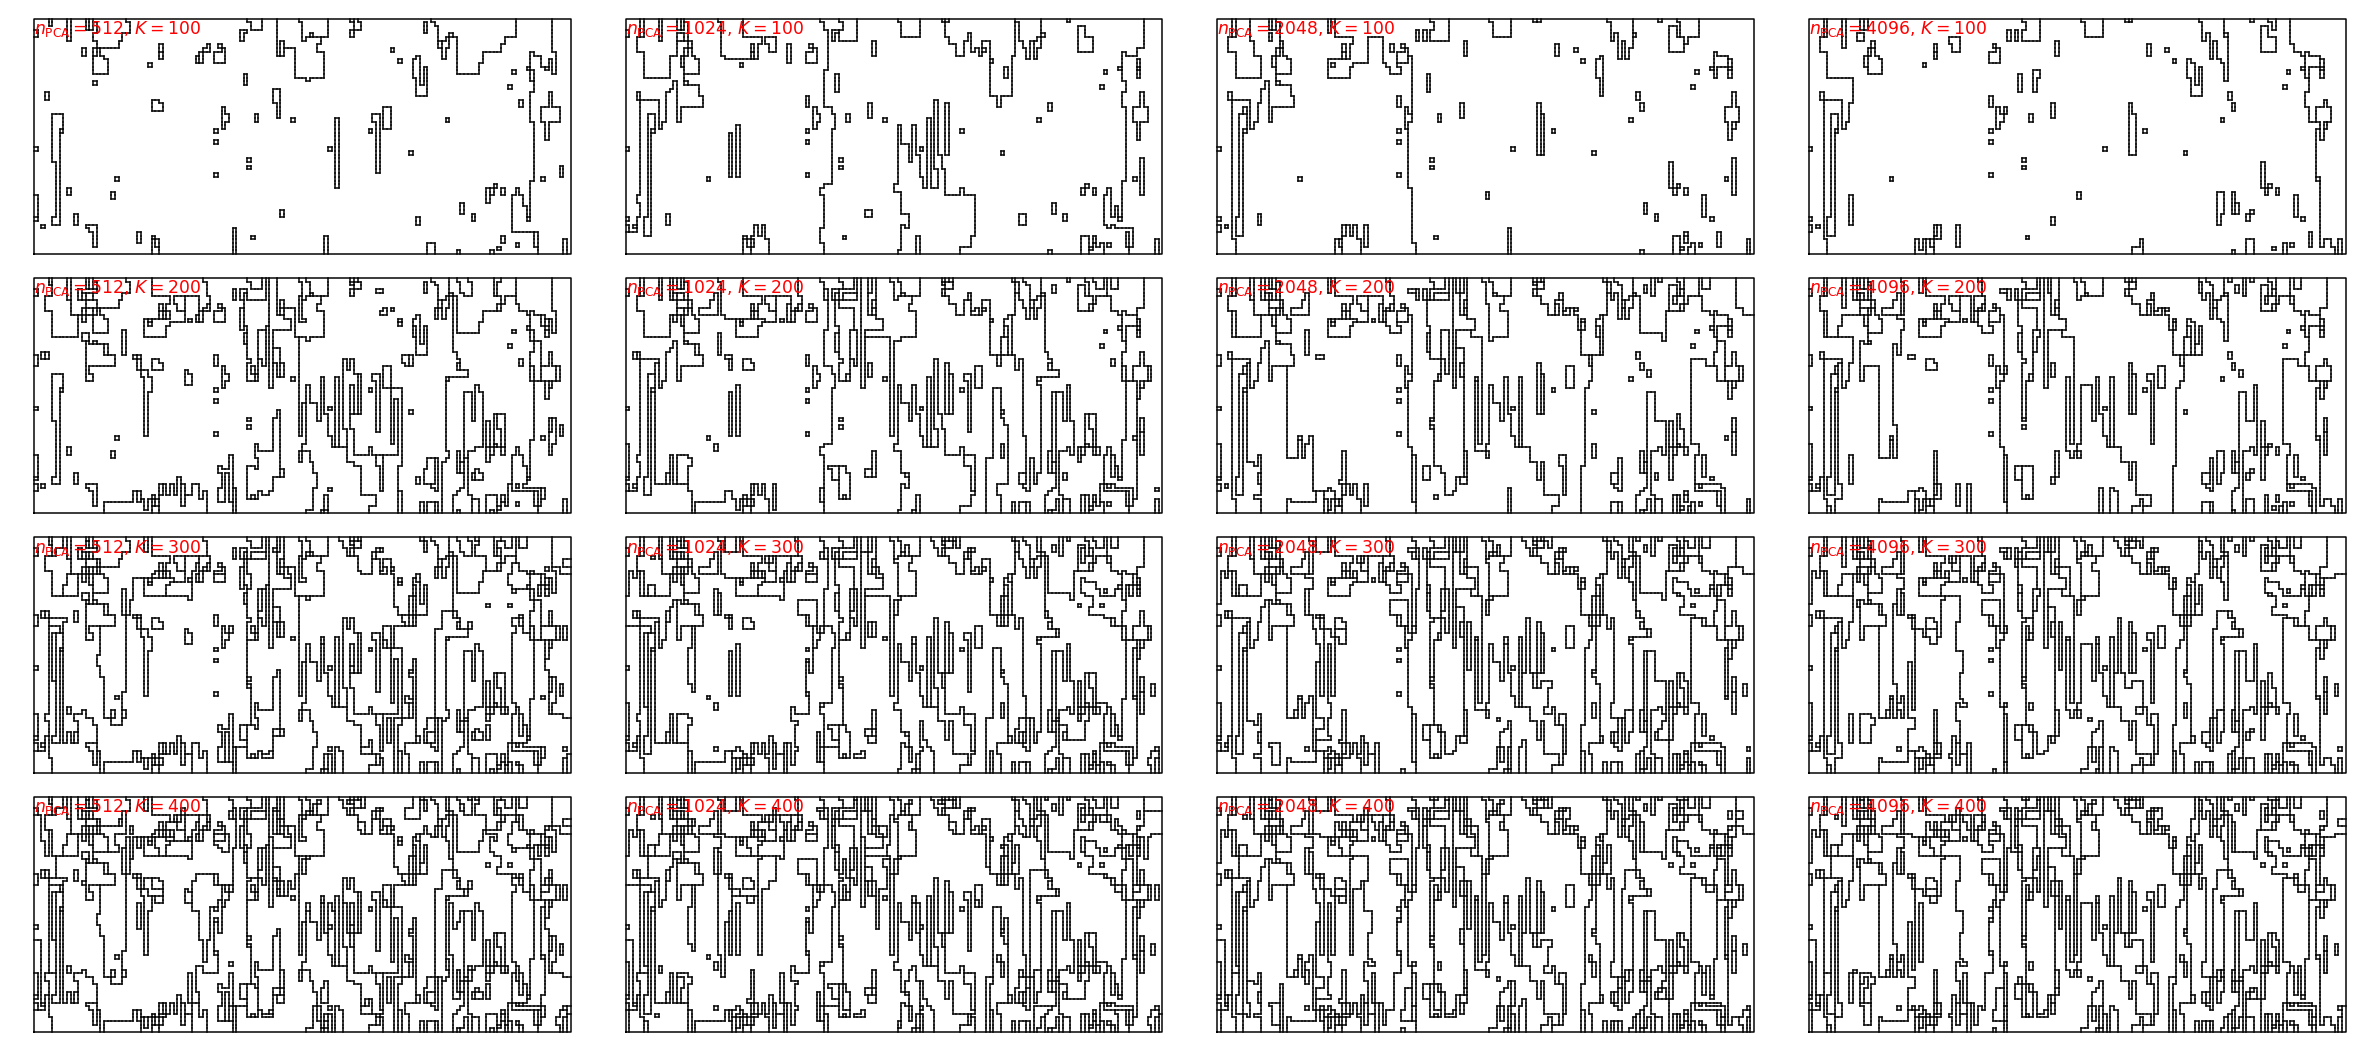

In [9]:
import sys
sys.path.append("..")
import numpy as np
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA

from scipy import fft


import lauetools.LaueTools.IOimagefile as IOimage

#from libtiff import TIFF

from sklearn import cluster
from sklearn.feature_extraction.image import grid_to_graph

from sklearn import metrics



def draw(ax,labels):
    nx,ny=labels.shape
    ax.plot([0,nx,nx,0,0],[0,0,ny,ny,0],'k')
    ax.set_aspect('equal')
    for i in range(nx):
        for j in range(ny-1):
            if labels[i,j]!=labels[i,j+1]:
                ax.plot([i,i+1],[j+1,j+1],'k')
    for i in range(nx-1):
        for j in range(ny):
            if labels[i,j]!=labels[i+1,j]:
                ax.plot([i+1,i+1],[j,j+1],'k')
    return None

#import matplotlib.gridspec as gridspec




nx,ny=64,146
ratio=ny/nx
connectivity = grid_to_graph(n_x=nx, n_y=ny)




#FA_spatial=np.load('0-64-60-124/spatial_features.npy')
FA_spatial=np.load('full_spatial_features.npy')

fig = plt.figure(constrained_layout=False,figsize=(12,12))
gs = fig.add_gridspec(nrows=4, ncols=4, left=0, right=1.2*ratio,bottom=0,top=1.2, wspace=0.002,hspace=0.002)

ns_pca=(512,1024,2048,4096)
ns_cluster=(100,200,300,400)

for i in range(4):
    pca = PCA(n_components=ns_pca[i], svd_solver='randomized')
    pca_features=pca.fit_transform(FA_spatial)#components_
    for j in range(4):
        ward = cluster.AgglomerativeClustering(n_clusters=ns_cluster[j], connectivity=connectivity, linkage='average',affinity='cosine').fit(pca_features)
        labels = ward.labels_
        labels=labels.reshape((nx,ny))
        labels=np.flip(labels.T,1)
        ax=fig.add_subplot(gs[j,i])
        draw(ax,labels)
        #if j==0:
        #    ax.set_title("$n_{\mathrm{PCA}}=%i$"%ns_pca[i],fontsize='xx-large')
        #if i==0:
        #    ax.set_ylabel("$K=%i$"%ns_cluster[j],fontsize='xx-large')
        ax.axis('off')
        ax.text(0,64,"$n_{\mathrm{PCA}}=$%i, $K=$%i"%(ns_pca[i],ns_cluster[j]),size='xx-large',verticalalignment='top',color='red')
#plt.savefig('fig9.tif',format='tif',bbox_inches ='tight')

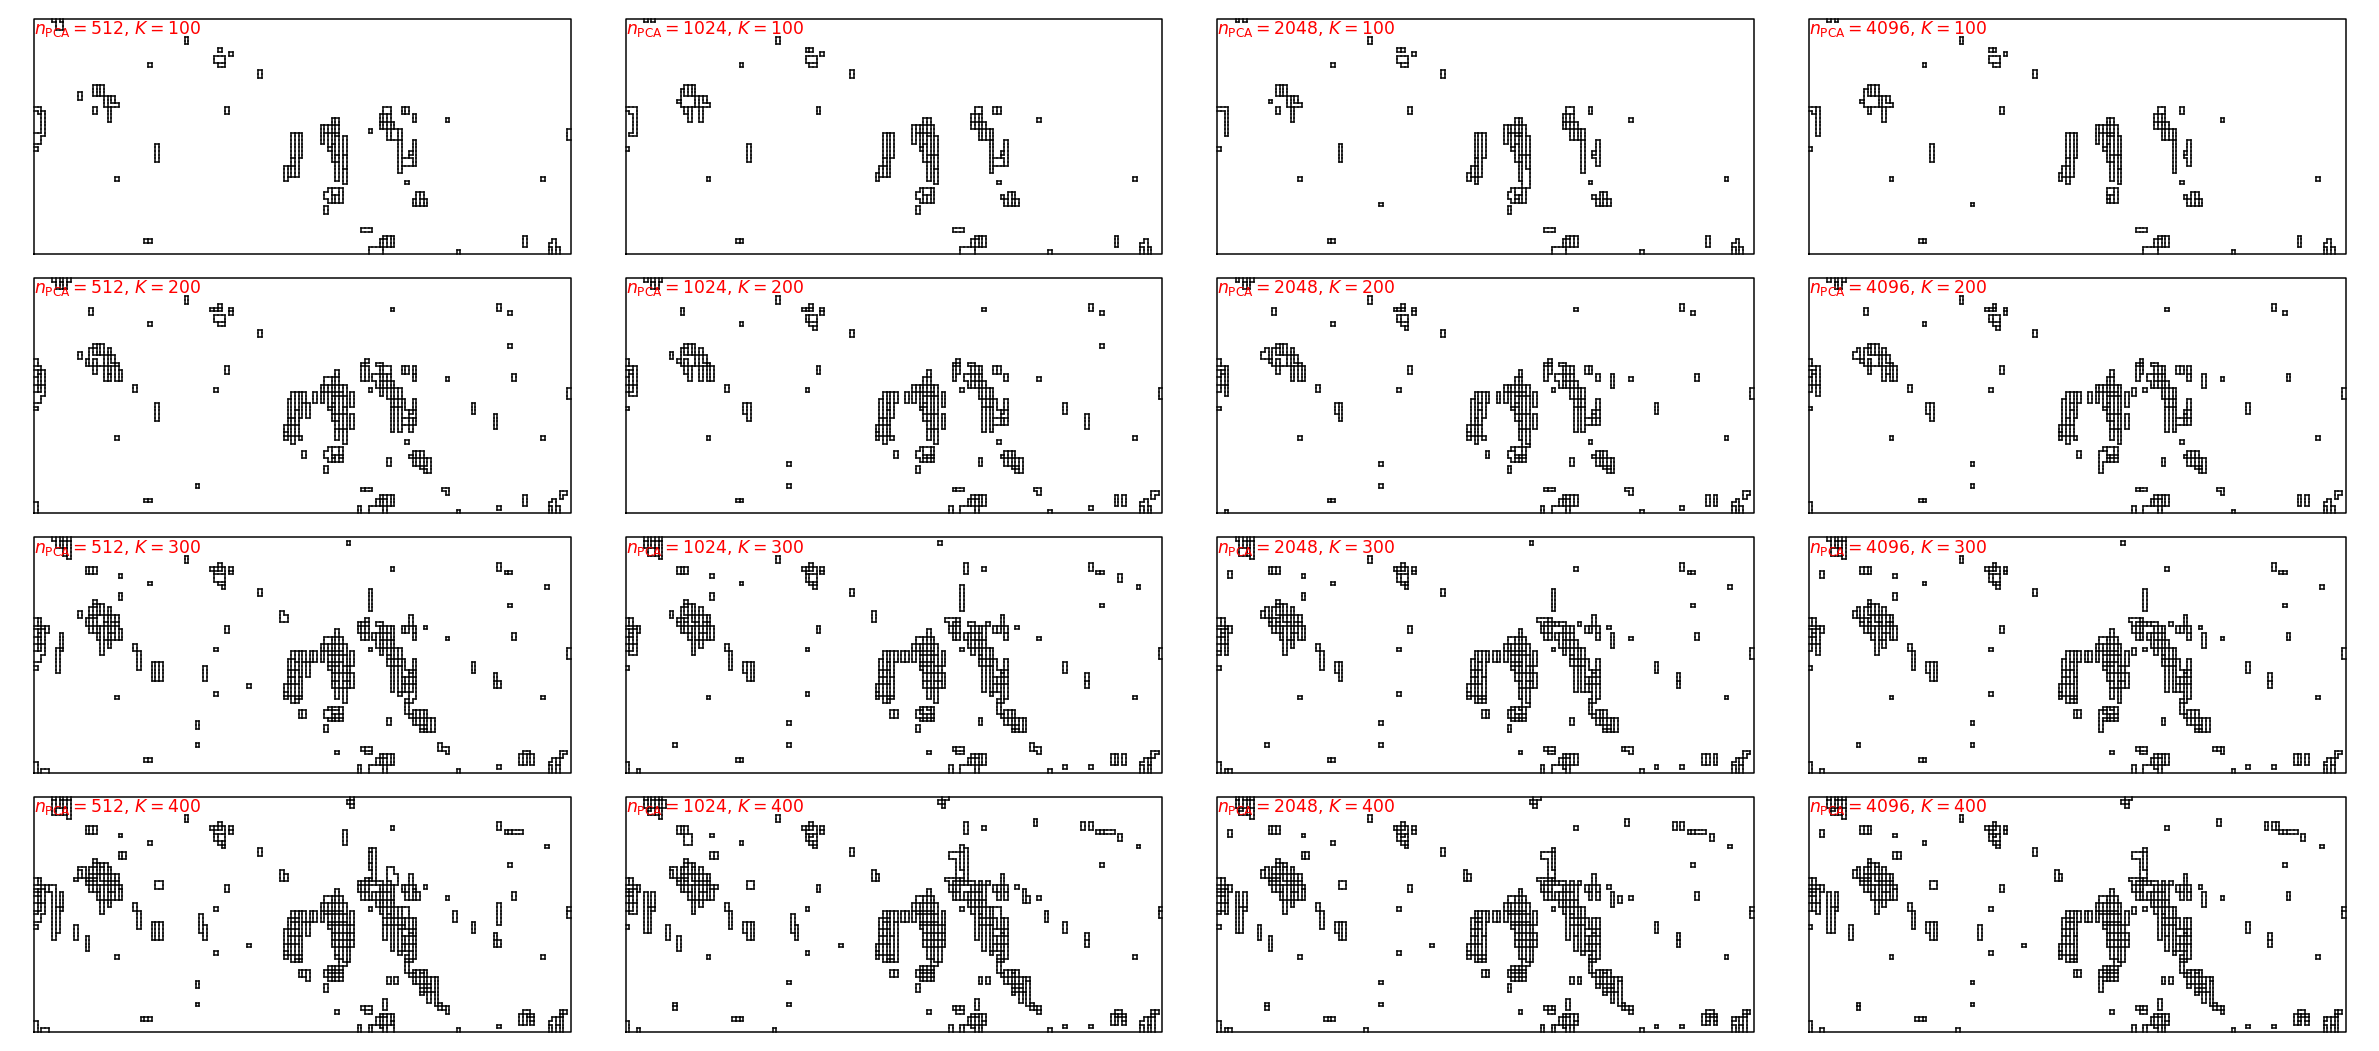

In [10]:
import sys
sys.path.append("..")
import numpy as np
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA

from scipy import fft


import lauetools.LaueTools.IOimagefile as IOimage

#from libtiff import TIFF

from sklearn import cluster
from sklearn.feature_extraction.image import grid_to_graph

from sklearn import metrics



def draw(ax,labels):
    nx,ny=labels.shape
    ax.plot([0,nx,nx,0,0],[0,0,ny,ny,0],'k')
    ax.set_aspect('equal')
    for i in range(nx):
        for j in range(ny-1):
            if labels[i,j]!=labels[i,j+1]:
                ax.plot([i,i+1],[j+1,j+1],'k')
    for i in range(nx-1):
        for j in range(ny):
            if labels[i,j]!=labels[i+1,j]:
                ax.plot([i+1,i+1],[j,j+1],'k')
    return None

#import matplotlib.gridspec as gridspec




nx,ny=64,146
ratio=ny/nx
connectivity = grid_to_graph(n_x=nx, n_y=ny)




#FA_spatial=np.load('0-64-60-124/spatial_features.npy')
FA_spatial=np.load('full_spatial_features.npy')

fig = plt.figure(constrained_layout=False,figsize=(12,12))
gs = fig.add_gridspec(nrows=4, ncols=4, left=0, right=1.2*ratio,bottom=0,top=1.2, wspace=0.002,hspace=0.002)

ns_pca=(512,1024,2048,4096)
ns_cluster=(100,200,300,400)

for i in range(4):
    pca = PCA(n_components=ns_pca[i], svd_solver='randomized')
    pca_features=pca.fit_transform(FA_spatial)#components_
    for j in range(4):
        ward = cluster.AgglomerativeClustering(n_clusters=ns_cluster[j], connectivity=connectivity, linkage='average',affinity='l2').fit(pca_features)
        labels = ward.labels_
        labels=labels.reshape((nx,ny))
        labels=np.flip(labels.T,1)
        ax=fig.add_subplot(gs[j,i])
        draw(ax,labels)
        #if j==0:
        #    ax.set_title("$n_{\mathrm{PCA}}=%i$"%ns_pca[i],fontsize='xx-large')
        #if i==0:
        #    ax.set_ylabel("$K=%i$"%ns_cluster[j],fontsize='xx-large')
        ax.axis('off')
        ax.text(0,64,"$n_{\mathrm{PCA}}=$%i, $K=$%i"%(ns_pca[i],ns_cluster[j]),size='xx-large',verticalalignment='top',color='red')
#plt.savefig('fig9.tif',format='tif',bbox_inches ='tight')

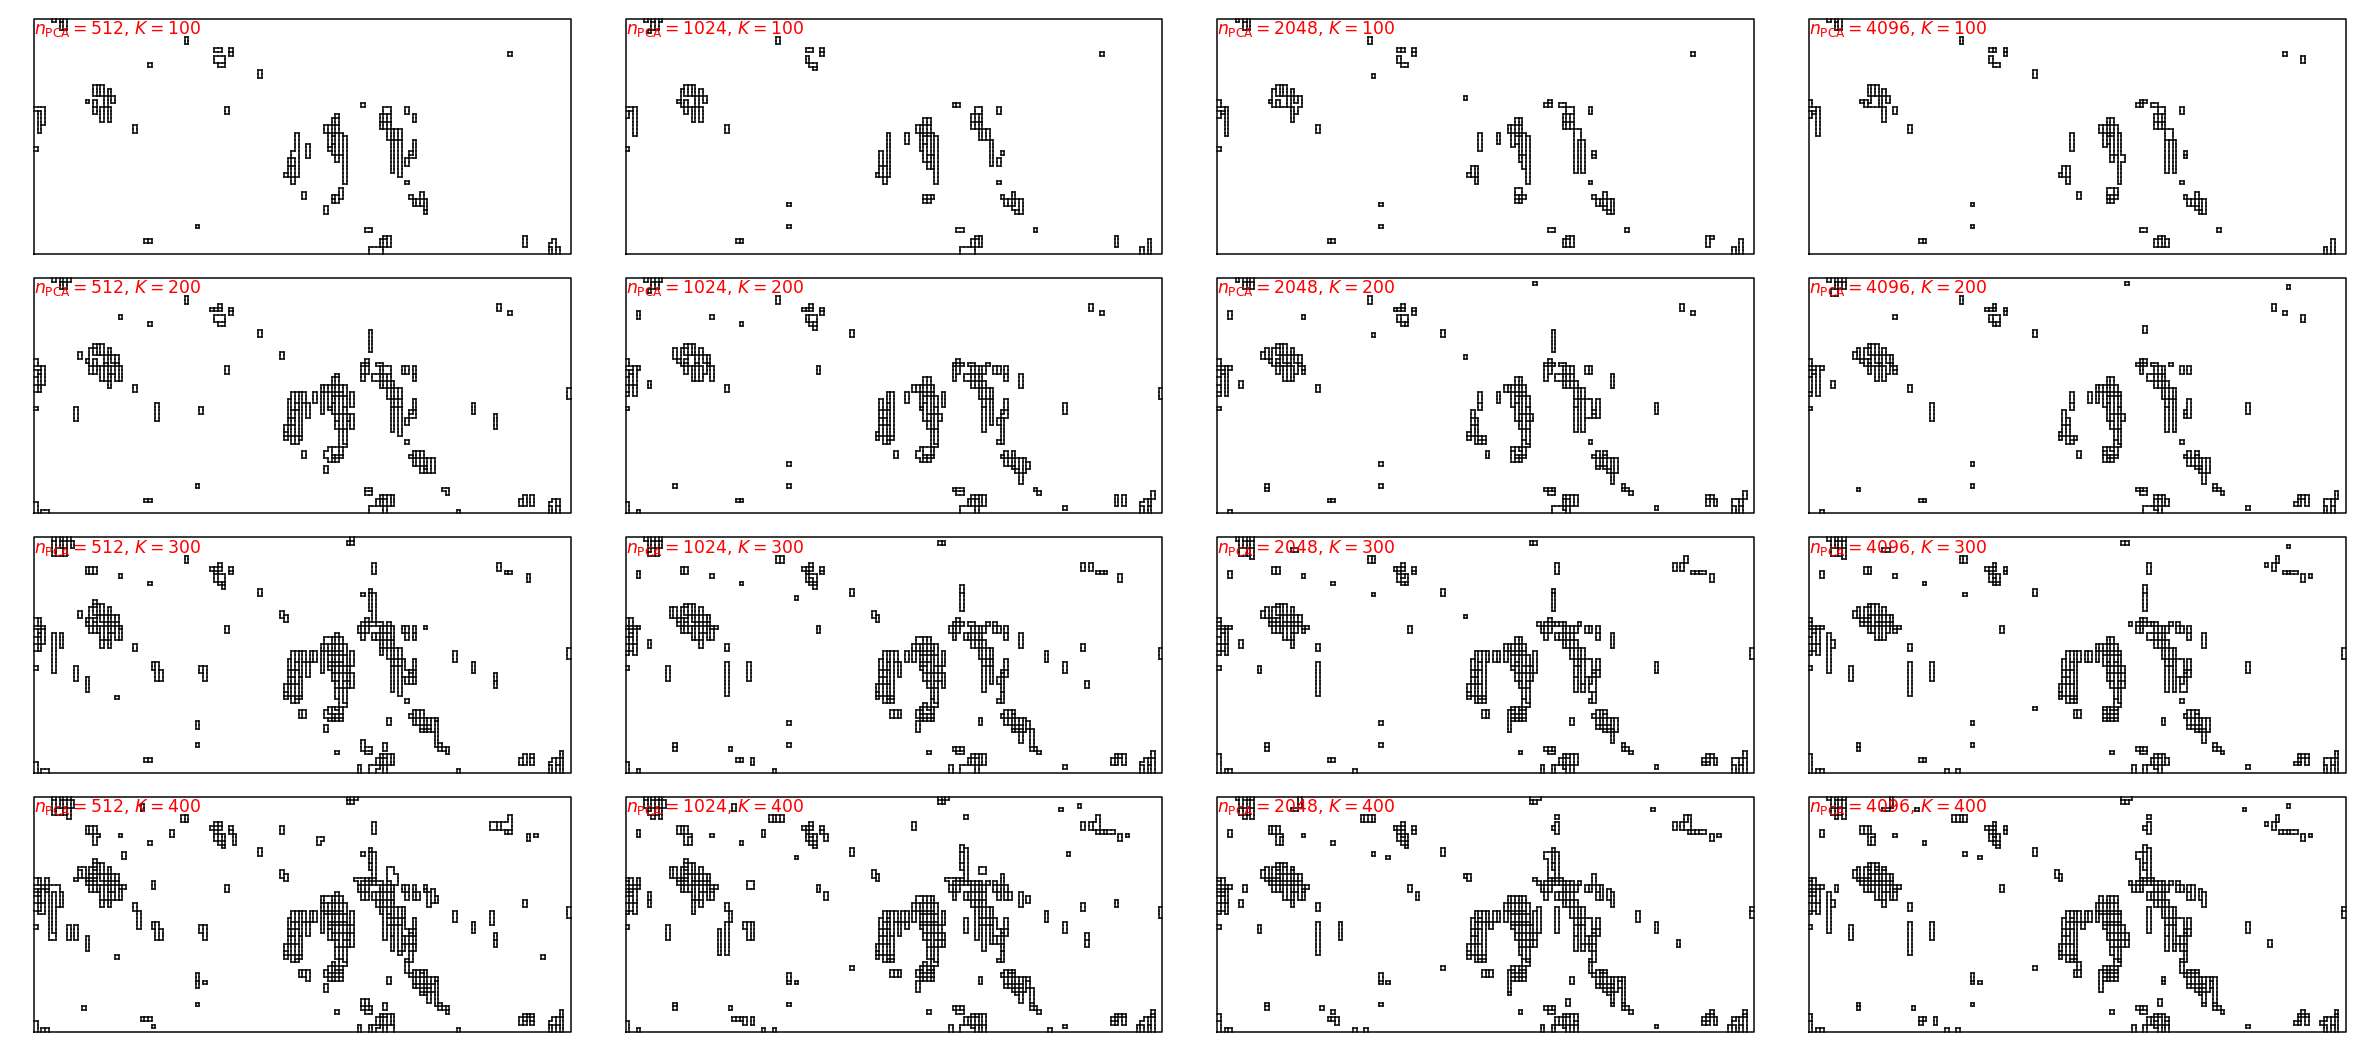

In [11]:
import sys
sys.path.append("..")
import numpy as np
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA

from scipy import fft


import lauetools.LaueTools.IOimagefile as IOimage

#from libtiff import TIFF

from sklearn import cluster
from sklearn.feature_extraction.image import grid_to_graph

from sklearn import metrics



def draw(ax,labels):
    nx,ny=labels.shape
    ax.plot([0,nx,nx,0,0],[0,0,ny,ny,0],'k')
    ax.set_aspect('equal')
    for i in range(nx):
        for j in range(ny-1):
            if labels[i,j]!=labels[i,j+1]:
                ax.plot([i,i+1],[j+1,j+1],'k')
    for i in range(nx-1):
        for j in range(ny):
            if labels[i,j]!=labels[i+1,j]:
                ax.plot([i+1,i+1],[j,j+1],'k')
    return None

#import matplotlib.gridspec as gridspec




nx,ny=64,146
ratio=ny/nx
connectivity = grid_to_graph(n_x=nx, n_y=ny)




#FA_spatial=np.load('0-64-60-124/spatial_features.npy')
FA_spatial=np.load('full_spatial_features.npy')

fig = plt.figure(constrained_layout=False,figsize=(12,12))
gs = fig.add_gridspec(nrows=4, ncols=4, left=0, right=1.2*ratio,bottom=0,top=1.2, wspace=0.002,hspace=0.002)

ns_pca=(512,1024,2048,4096)
ns_cluster=(100,200,300,400)

for i in range(4):
    pca = PCA(n_components=ns_pca[i], svd_solver='randomized')
    pca_features=pca.fit_transform(FA_spatial)#components_
    for j in range(4):
        ward = cluster.AgglomerativeClustering(n_clusters=ns_cluster[j], connectivity=connectivity, linkage='average',affinity='l1').fit(pca_features)
        labels = ward.labels_
        labels=labels.reshape((nx,ny))
        labels=np.flip(labels.T,1)
        ax=fig.add_subplot(gs[j,i])
        draw(ax,labels)
        #if j==0:
        #    ax.set_title("$n_{\mathrm{PCA}}=%i$"%ns_pca[i],fontsize='xx-large')
        #if i==0:
        #    ax.set_ylabel("$K=%i$"%ns_cluster[j],fontsize='xx-large')
        ax.axis('off')
        ax.text(0,64,"$n_{\mathrm{PCA}}=$%i, $K=$%i"%(ns_pca[i],ns_cluster[j]),size='xx-large',verticalalignment='top',color='red')
#plt.savefig('fig9.tif',format='tif',bbox_inches ='tight')

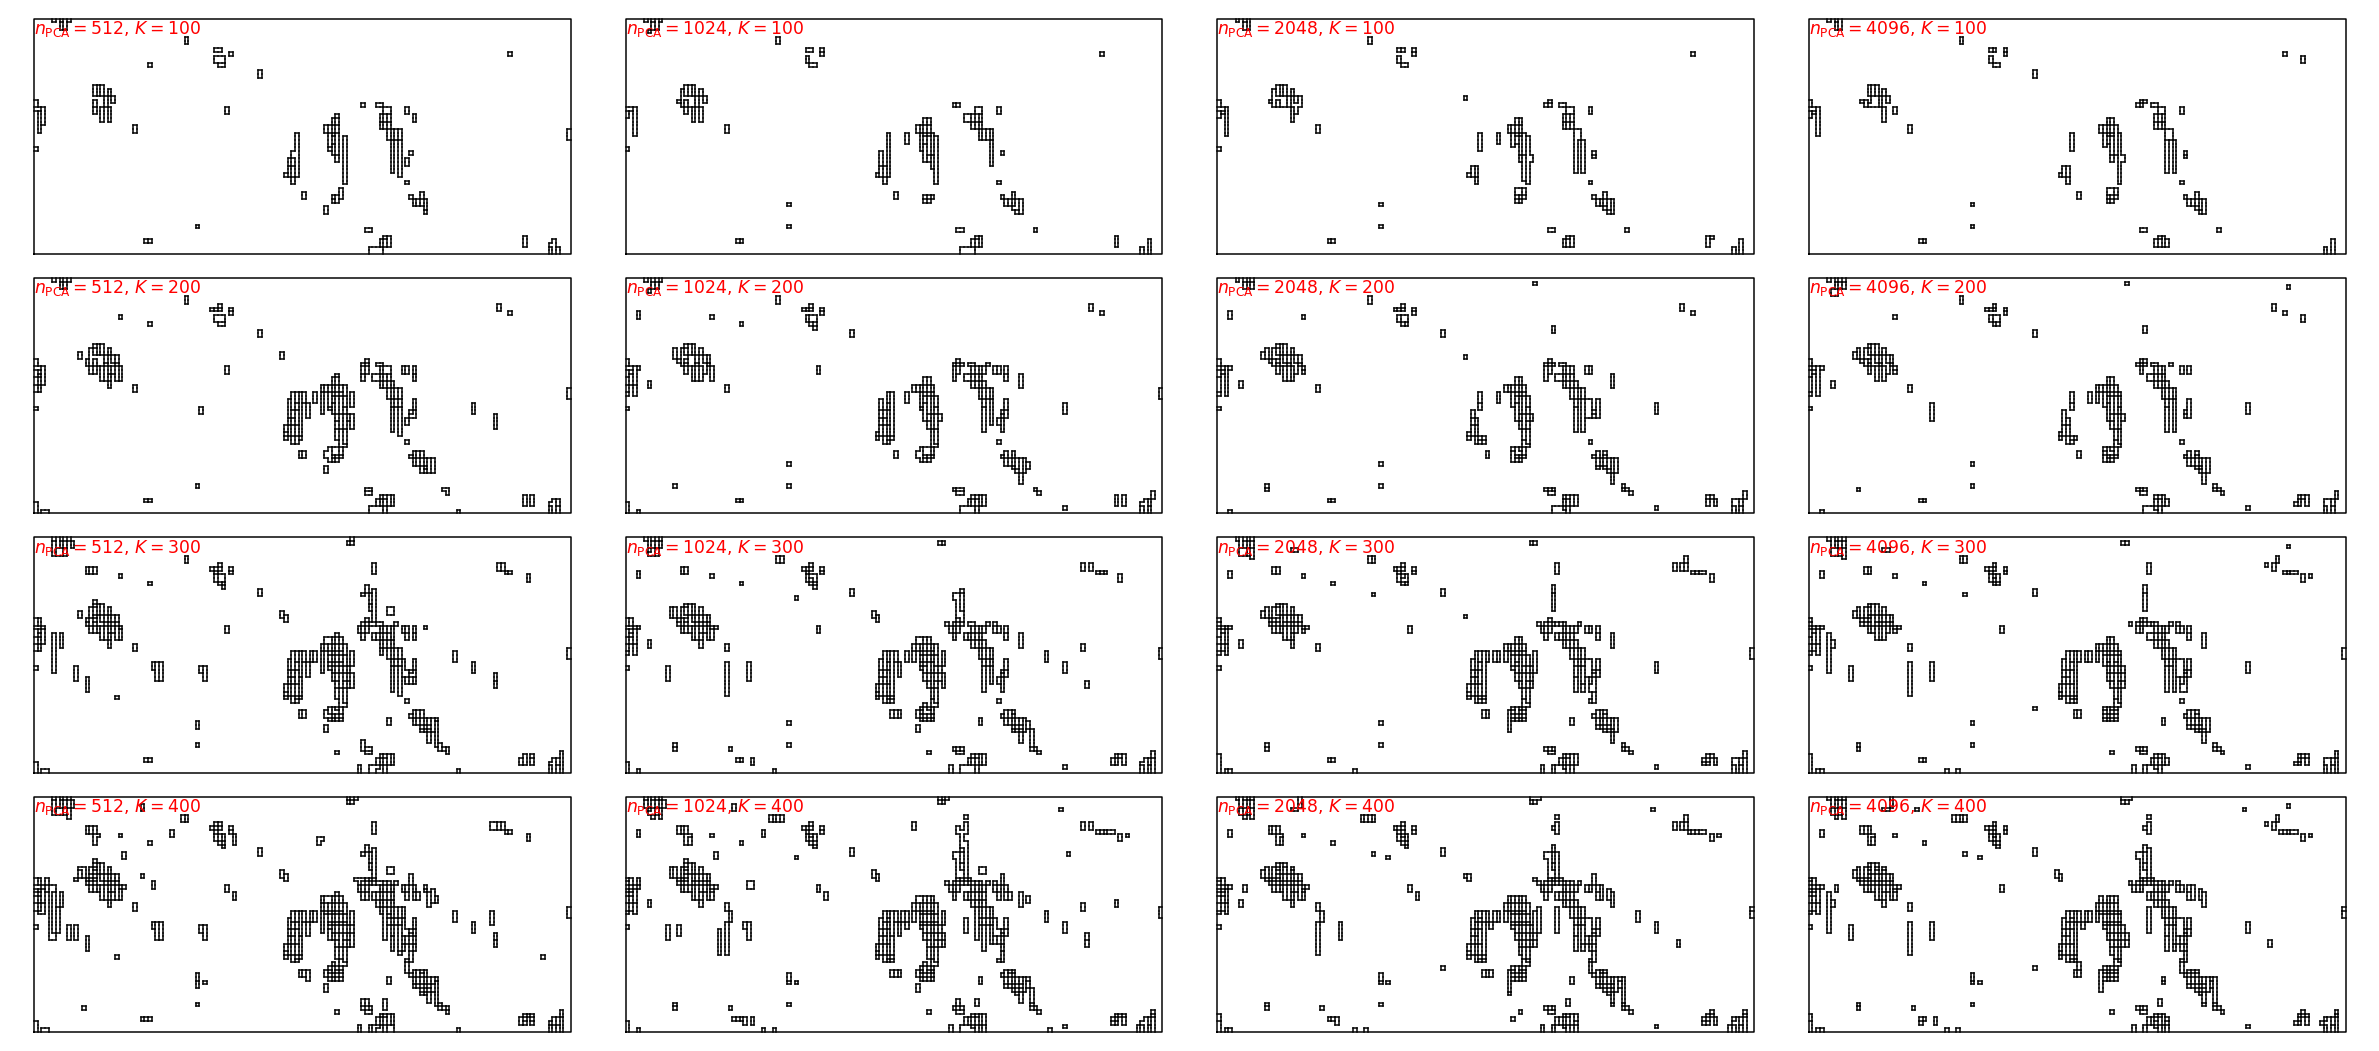

In [17]:
import sys
sys.path.append("..")
import numpy as np
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA

from scipy import fft


import lauetools.LaueTools.IOimagefile as IOimage

#from libtiff import TIFF

from sklearn import cluster
from sklearn.feature_extraction.image import grid_to_graph

from sklearn import metrics



def draw(ax,labels):
    nx,ny=labels.shape
    ax.plot([0,nx,nx,0,0],[0,0,ny,ny,0],'k')
    ax.set_aspect('equal')
    for i in range(nx):
        for j in range(ny-1):
            if labels[i,j]!=labels[i,j+1]:
                ax.plot([i,i+1],[j+1,j+1],'k')
    for i in range(nx-1):
        for j in range(ny):
            if labels[i,j]!=labels[i+1,j]:
                ax.plot([i+1,i+1],[j,j+1],'k')
    return None

#import matplotlib.gridspec as gridspec




nx,ny=64,146
ratio=ny/nx
connectivity = grid_to_graph(n_x=nx, n_y=ny)




#FA_spatial=np.load('0-64-60-124/spatial_features.npy')
FA_spatial=np.load('full_spatial_features.npy')

fig = plt.figure(constrained_layout=False,figsize=(12,12))
gs = fig.add_gridspec(nrows=4, ncols=4, left=0, right=1.2*ratio,bottom=0,top=1.2, wspace=0.002,hspace=0.002)

ns_pca=(512,1024,2048,4096)
ns_cluster=(100,200,300,400)

for i in range(4):
    pca = PCA(n_components=ns_pca[i], svd_solver='randomized')
    pca_features=pca.fit_transform(FA_spatial)#components_
    for j in range(4):
        ward = cluster.AgglomerativeClustering(n_clusters=ns_cluster[j], connectivity=connectivity, linkage='average',affinity='manhattan').fit(pca_features)
        labels = ward.labels_
        labels=labels.reshape((nx,ny))
        labels=np.flip(labels.T,1)
        ax=fig.add_subplot(gs[j,i])
        draw(ax,labels)
        #if j==0:
        #    ax.set_title("$n_{\mathrm{PCA}}=%i$"%ns_pca[i],fontsize='xx-large')
        #if i==0:
        #    ax.set_ylabel("$K=%i$"%ns_cluster[j],fontsize='xx-large')
        ax.axis('off')
        ax.text(0,64,"$n_{\mathrm{PCA}}=$%i, $K=$%i"%(ns_pca[i],ns_cluster[j]),size='xx-large',verticalalignment='top',color='red')
#plt.savefig('fig9.tif',format='tif',bbox_inches ='tight')

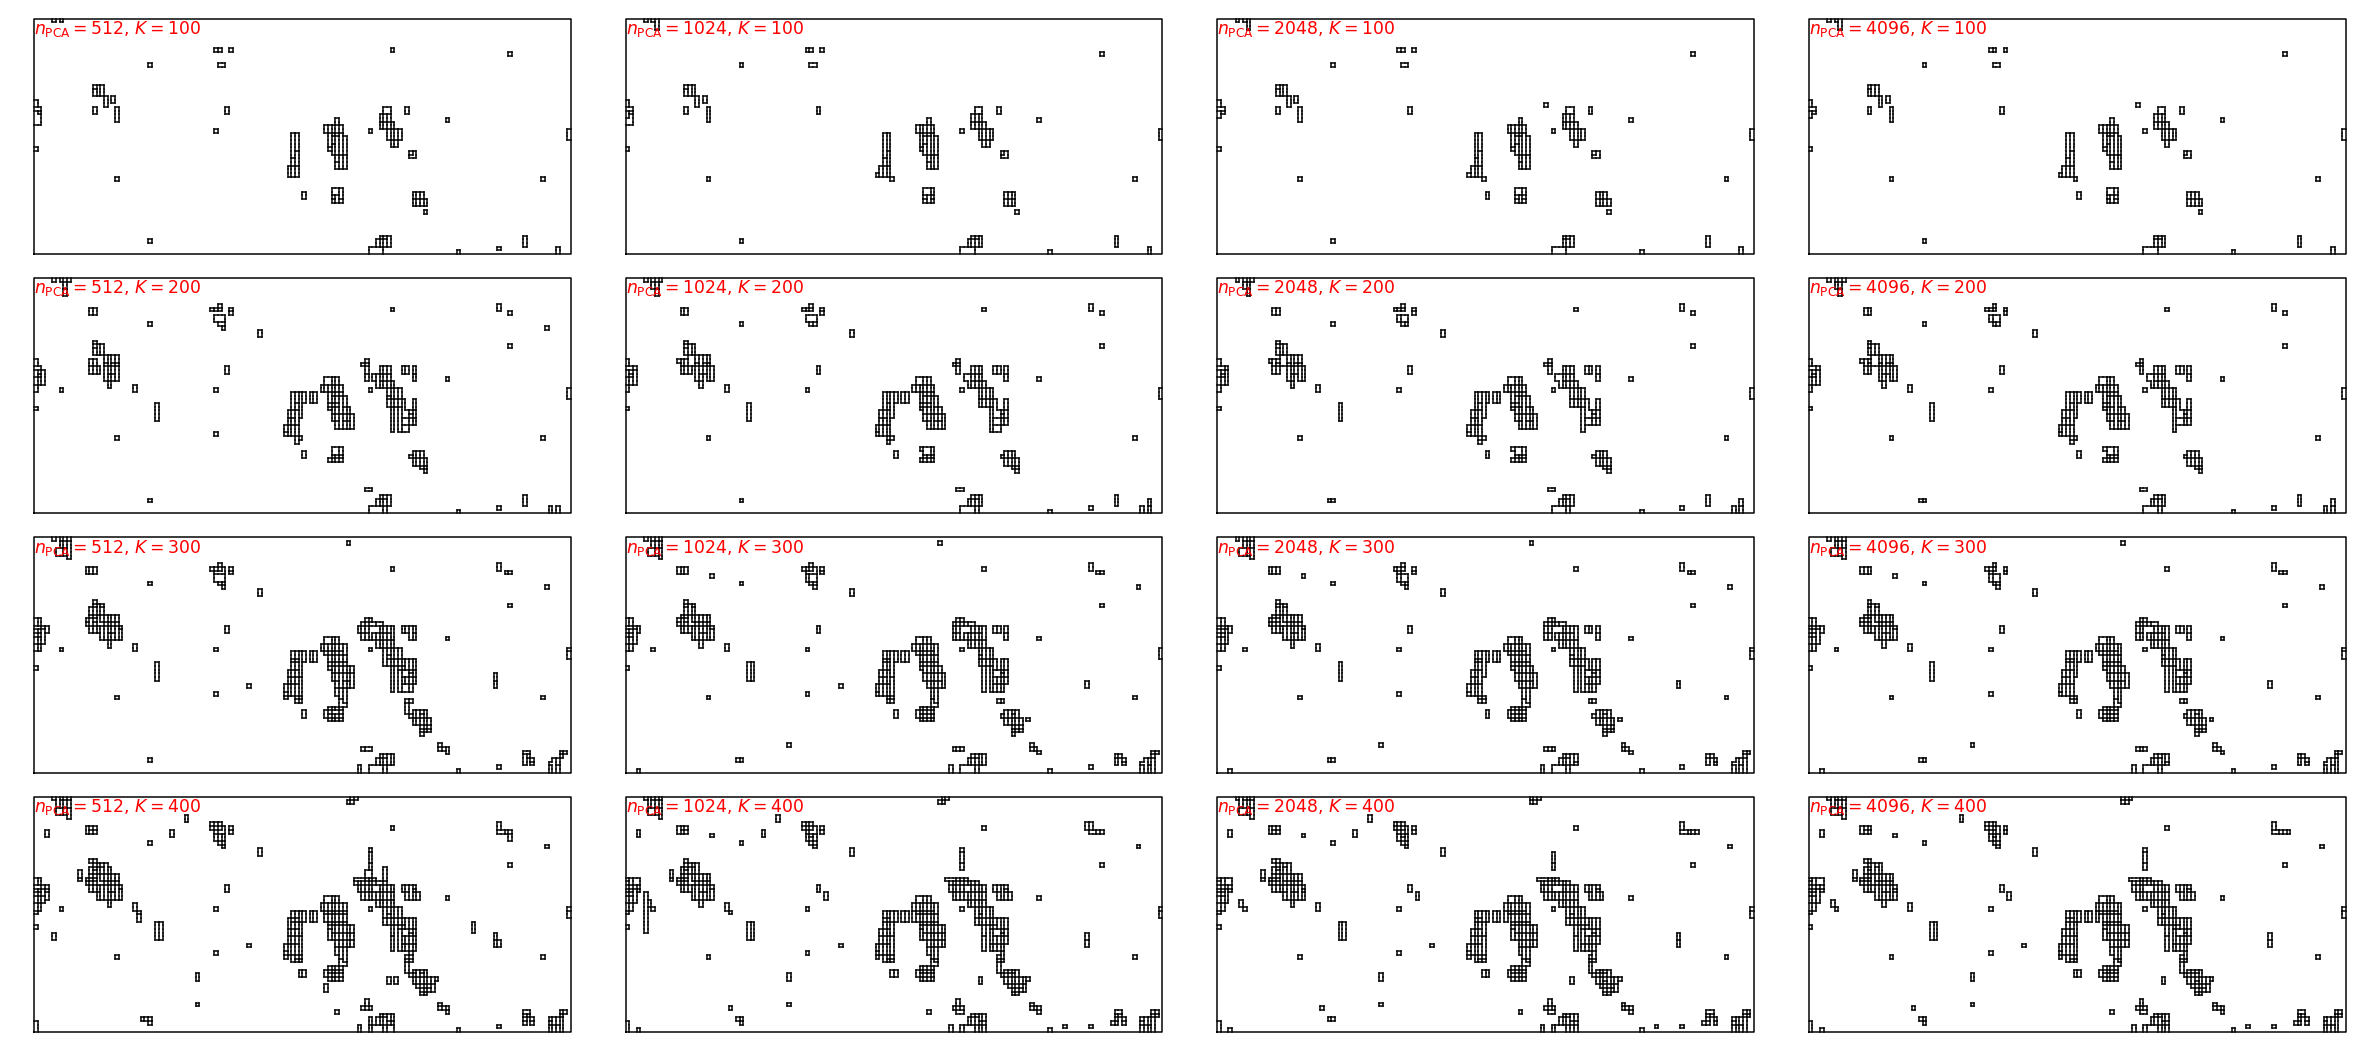

In [12]:
import sys
sys.path.append("..")
import numpy as np
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA

from scipy import fft


import lauetools.LaueTools.IOimagefile as IOimage

#from libtiff import TIFF

from sklearn import cluster
from sklearn.feature_extraction.image import grid_to_graph

from sklearn import metrics



def draw(ax,labels):
    nx,ny=labels.shape
    ax.plot([0,nx,nx,0,0],[0,0,ny,ny,0],'k')
    ax.set_aspect('equal')
    for i in range(nx):
        for j in range(ny-1):
            if labels[i,j]!=labels[i,j+1]:
                ax.plot([i,i+1],[j+1,j+1],'k')
    for i in range(nx-1):
        for j in range(ny):
            if labels[i,j]!=labels[i+1,j]:
                ax.plot([i+1,i+1],[j,j+1],'k')
    return None

#import matplotlib.gridspec as gridspec




nx,ny=64,146
ratio=ny/nx
connectivity = grid_to_graph(n_x=nx, n_y=ny)




#FA_spatial=np.load('0-64-60-124/spatial_features.npy')
FA_spatial=np.load('full_spatial_features.npy')

fig = plt.figure(constrained_layout=False,figsize=(12,12))
gs = fig.add_gridspec(nrows=4, ncols=4, left=0, right=1.2*ratio,bottom=0,top=1.2, wspace=0.002,hspace=0.002)

ns_pca=(512,1024,2048,4096)
ns_cluster=(100,200,300,400)

for i in range(4):
    pca = PCA(n_components=ns_pca[i], svd_solver='randomized')
    pca_features=pca.fit_transform(FA_spatial)#components_
    for j in range(4):
        ward = cluster.AgglomerativeClustering(n_clusters=ns_cluster[j], connectivity=connectivity, linkage='single',affinity='euclidean').fit(pca_features)
        labels = ward.labels_
        labels=labels.reshape((nx,ny))
        labels=np.flip(labels.T,1)
        ax=fig.add_subplot(gs[j,i])
        draw(ax,labels)
        #if j==0:
        #    ax.set_title("$n_{\mathrm{PCA}}=%i$"%ns_pca[i],fontsize='xx-large')
        #if i==0:
        #    ax.set_ylabel("$K=%i$"%ns_cluster[j],fontsize='xx-large')
        ax.axis('off')
        ax.text(0,64,"$n_{\mathrm{PCA}}=$%i, $K=$%i"%(ns_pca[i],ns_cluster[j]),size='xx-large',verticalalignment='top',color='red')
#plt.savefig('fig9.tif',format='tif',bbox_inches ='tight')

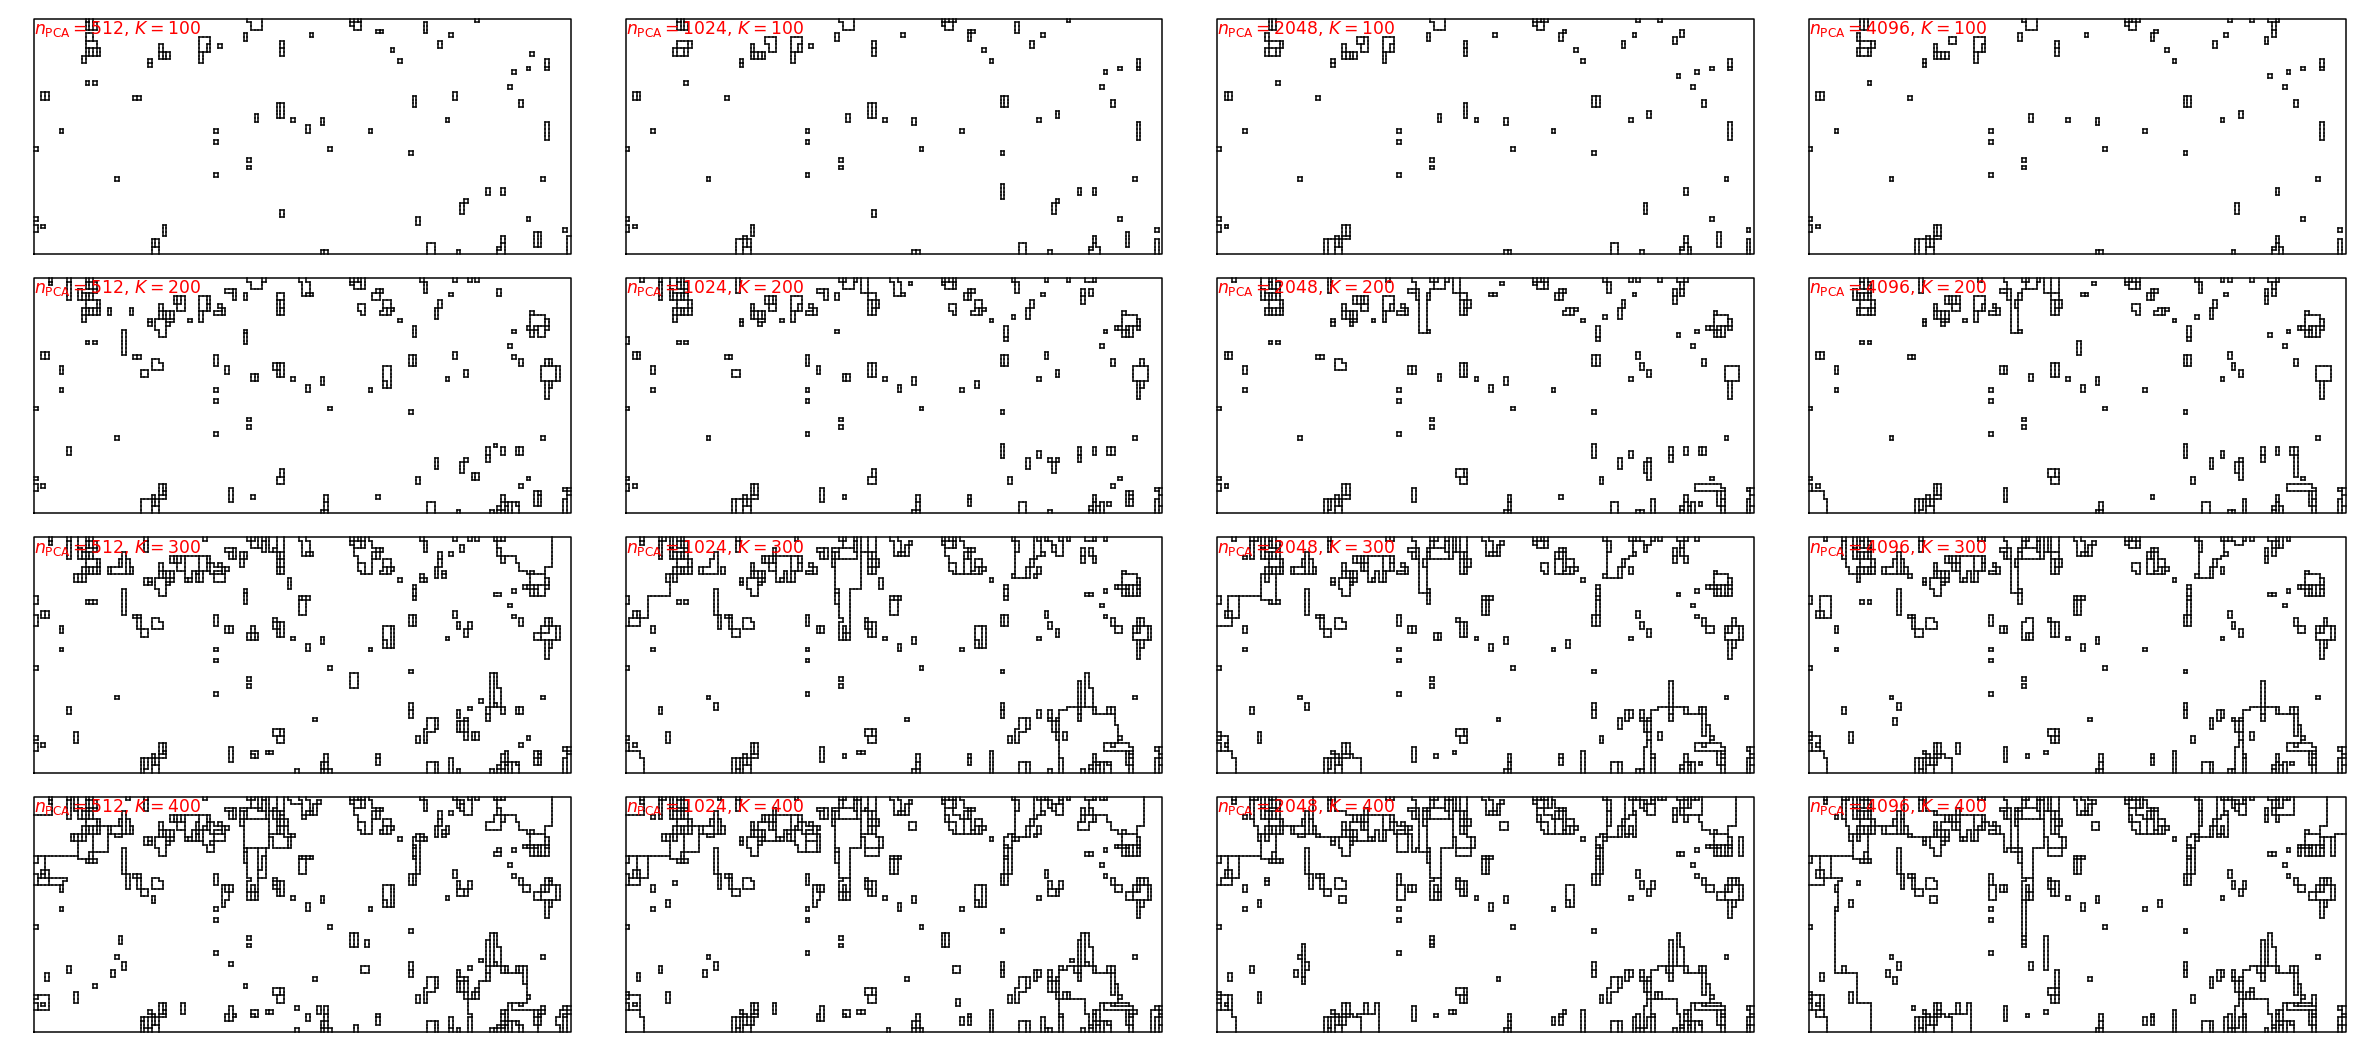

In [13]:
import sys
sys.path.append("..")
import numpy as np
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA

from scipy import fft


import lauetools.LaueTools.IOimagefile as IOimage

#from libtiff import TIFF

from sklearn import cluster
from sklearn.feature_extraction.image import grid_to_graph

from sklearn import metrics



def draw(ax,labels):
    nx,ny=labels.shape
    ax.plot([0,nx,nx,0,0],[0,0,ny,ny,0],'k')
    ax.set_aspect('equal')
    for i in range(nx):
        for j in range(ny-1):
            if labels[i,j]!=labels[i,j+1]:
                ax.plot([i,i+1],[j+1,j+1],'k')
    for i in range(nx-1):
        for j in range(ny):
            if labels[i,j]!=labels[i+1,j]:
                ax.plot([i+1,i+1],[j,j+1],'k')
    return None

#import matplotlib.gridspec as gridspec




nx,ny=64,146
ratio=ny/nx
connectivity = grid_to_graph(n_x=nx, n_y=ny)




#FA_spatial=np.load('0-64-60-124/spatial_features.npy')
FA_spatial=np.load('full_spatial_features.npy')

fig = plt.figure(constrained_layout=False,figsize=(12,12))
gs = fig.add_gridspec(nrows=4, ncols=4, left=0, right=1.2*ratio,bottom=0,top=1.2, wspace=0.002,hspace=0.002)

ns_pca=(512,1024,2048,4096)
ns_cluster=(100,200,300,400)

for i in range(4):
    pca = PCA(n_components=ns_pca[i], svd_solver='randomized')
    pca_features=pca.fit_transform(FA_spatial)#components_
    for j in range(4):
        ward = cluster.AgglomerativeClustering(n_clusters=ns_cluster[j], connectivity=connectivity, linkage='single',affinity='cosine').fit(pca_features)
        labels = ward.labels_
        labels=labels.reshape((nx,ny))
        labels=np.flip(labels.T,1)
        ax=fig.add_subplot(gs[j,i])
        draw(ax,labels)
        #if j==0:
        #    ax.set_title("$n_{\mathrm{PCA}}=%i$"%ns_pca[i],fontsize='xx-large')
        #if i==0:
        #    ax.set_ylabel("$K=%i$"%ns_cluster[j],fontsize='xx-large')
        ax.axis('off')
        ax.text(0,64,"$n_{\mathrm{PCA}}=$%i, $K=$%i"%(ns_pca[i],ns_cluster[j]),size='xx-large',verticalalignment='top',color='red')
#plt.savefig('fig9.tif',format='tif',bbox_inches ='tight')

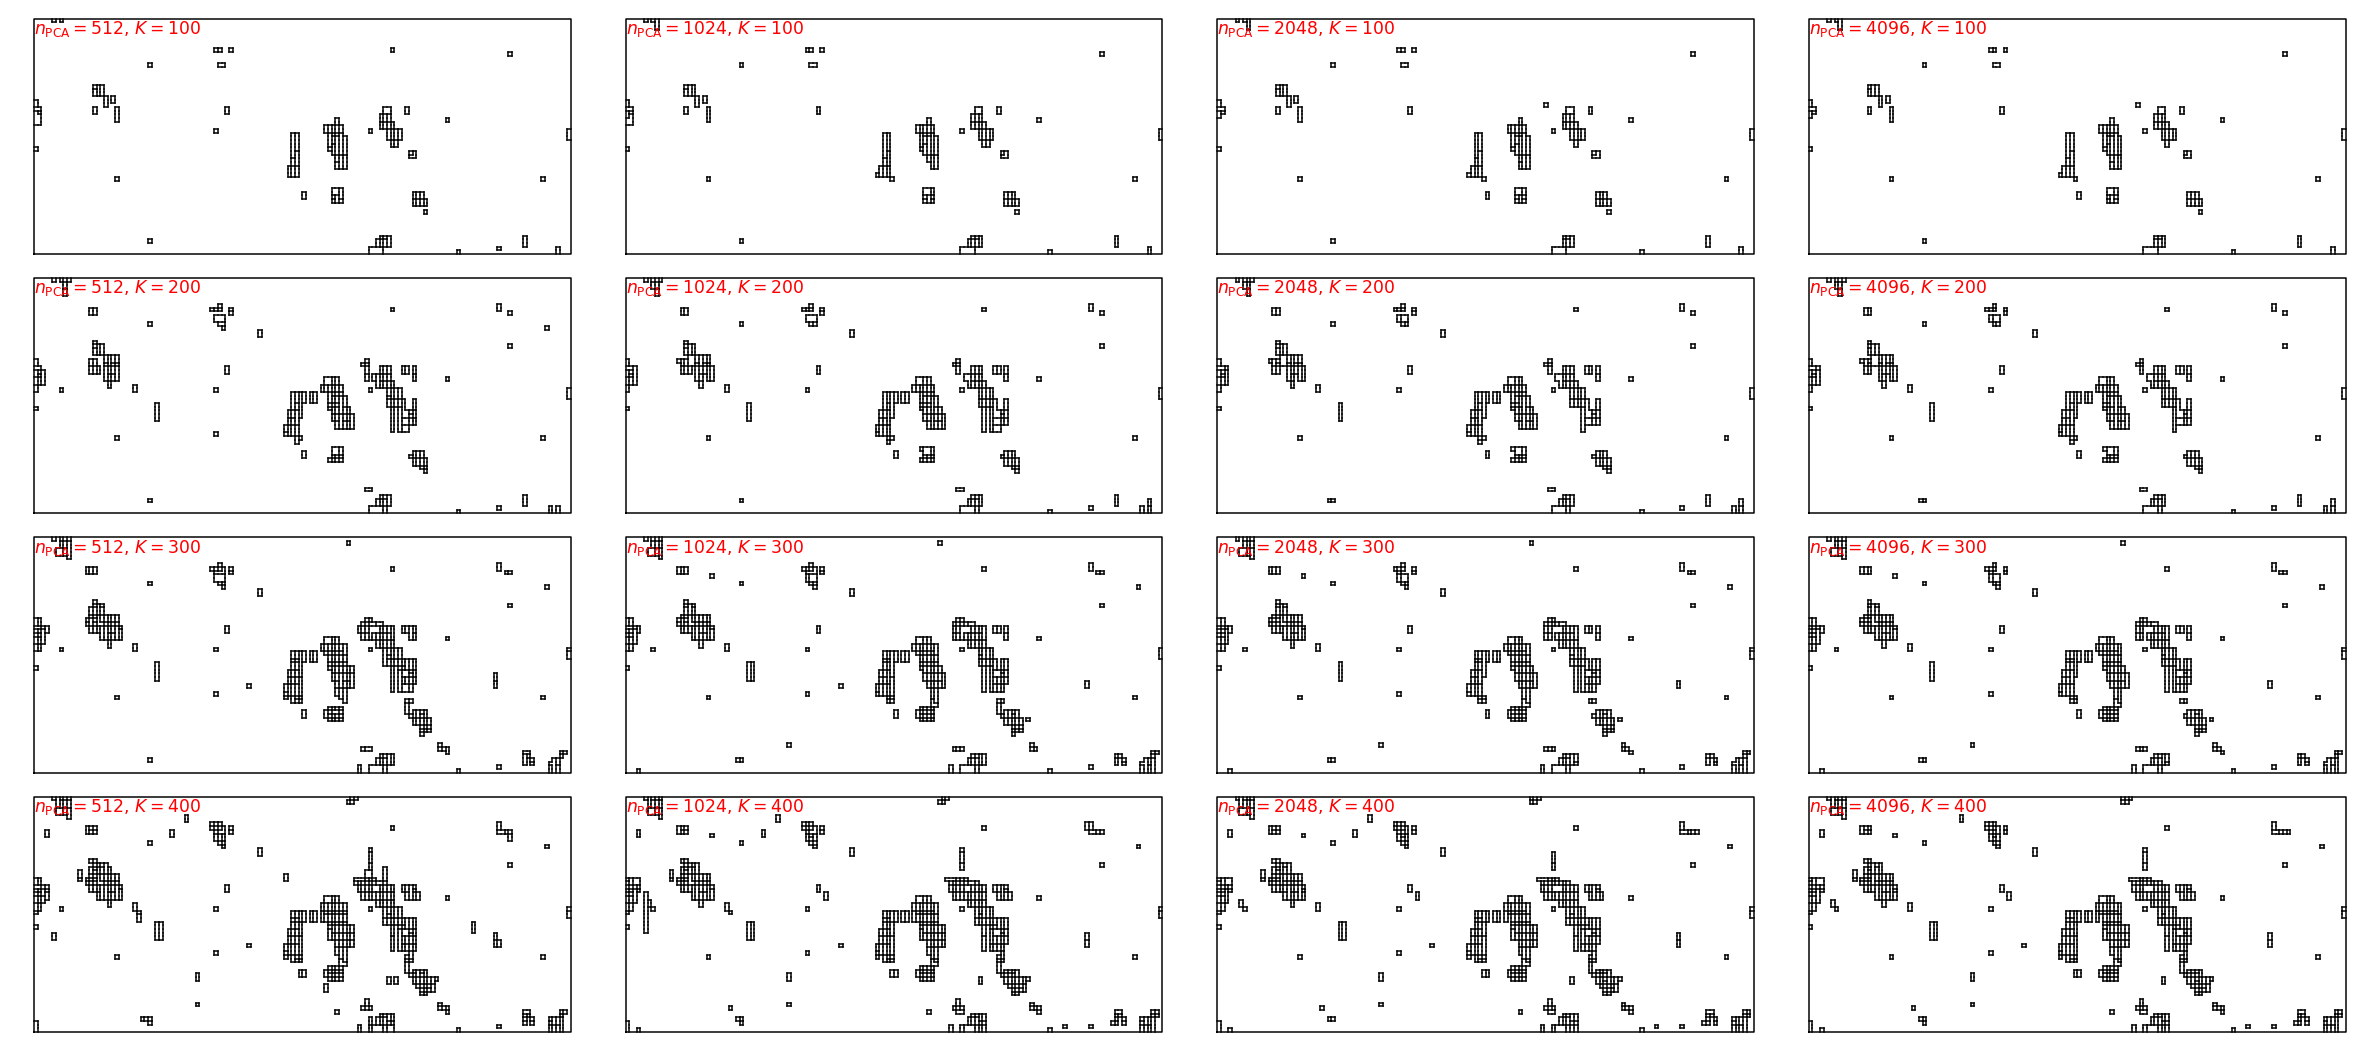

In [14]:
import sys
sys.path.append("..")
import numpy as np
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA

from scipy import fft


import lauetools.LaueTools.IOimagefile as IOimage

#from libtiff import TIFF

from sklearn import cluster
from sklearn.feature_extraction.image import grid_to_graph

from sklearn import metrics



def draw(ax,labels):
    nx,ny=labels.shape
    ax.plot([0,nx,nx,0,0],[0,0,ny,ny,0],'k')
    ax.set_aspect('equal')
    for i in range(nx):
        for j in range(ny-1):
            if labels[i,j]!=labels[i,j+1]:
                ax.plot([i,i+1],[j+1,j+1],'k')
    for i in range(nx-1):
        for j in range(ny):
            if labels[i,j]!=labels[i+1,j]:
                ax.plot([i+1,i+1],[j,j+1],'k')
    return None

#import matplotlib.gridspec as gridspec




nx,ny=64,146
ratio=ny/nx
connectivity = grid_to_graph(n_x=nx, n_y=ny)




#FA_spatial=np.load('0-64-60-124/spatial_features.npy')
FA_spatial=np.load('full_spatial_features.npy')

fig = plt.figure(constrained_layout=False,figsize=(12,12))
gs = fig.add_gridspec(nrows=4, ncols=4, left=0, right=1.2*ratio,bottom=0,top=1.2, wspace=0.002,hspace=0.002)

ns_pca=(512,1024,2048,4096)
ns_cluster=(100,200,300,400)

for i in range(4):
    pca = PCA(n_components=ns_pca[i], svd_solver='randomized')
    pca_features=pca.fit_transform(FA_spatial)#components_
    for j in range(4):
        ward = cluster.AgglomerativeClustering(n_clusters=ns_cluster[j], connectivity=connectivity, linkage='single',affinity='l2').fit(pca_features)
        labels = ward.labels_
        labels=labels.reshape((nx,ny))
        labels=np.flip(labels.T,1)
        ax=fig.add_subplot(gs[j,i])
        draw(ax,labels)
        #if j==0:
        #    ax.set_title("$n_{\mathrm{PCA}}=%i$"%ns_pca[i],fontsize='xx-large')
        #if i==0:
        #    ax.set_ylabel("$K=%i$"%ns_cluster[j],fontsize='xx-large')
        ax.axis('off')
        ax.text(0,64,"$n_{\mathrm{PCA}}=$%i, $K=$%i"%(ns_pca[i],ns_cluster[j]),size='xx-large',verticalalignment='top',color='red')
#plt.savefig('fig9.tif',format='tif',bbox_inches ='tight')

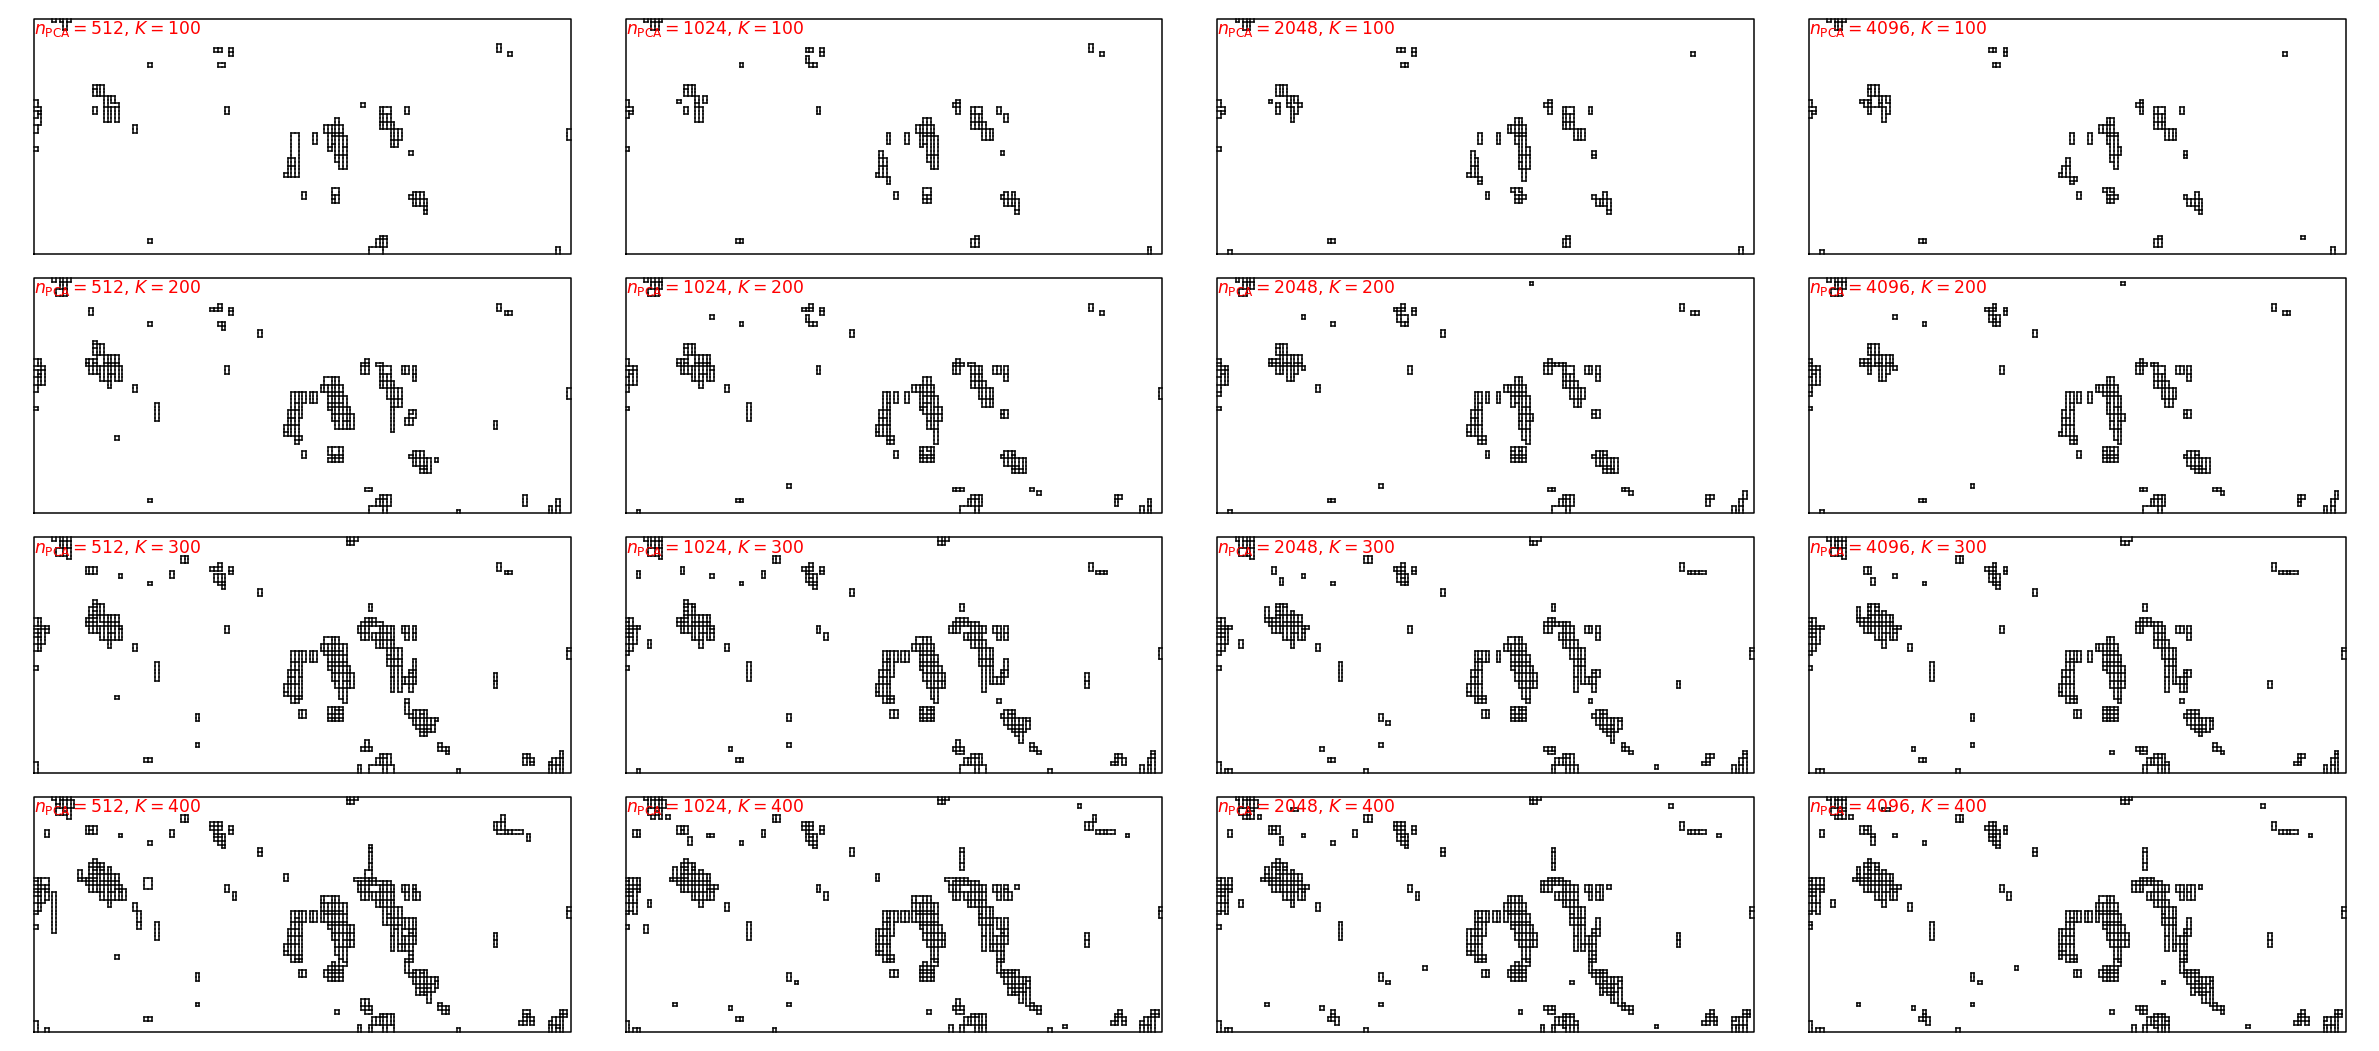

In [15]:
import sys
sys.path.append("..")
import numpy as np
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA

from scipy import fft


import lauetools.LaueTools.IOimagefile as IOimage

#from libtiff import TIFF

from sklearn import cluster
from sklearn.feature_extraction.image import grid_to_graph

from sklearn import metrics



def draw(ax,labels):
    nx,ny=labels.shape
    ax.plot([0,nx,nx,0,0],[0,0,ny,ny,0],'k')
    ax.set_aspect('equal')
    for i in range(nx):
        for j in range(ny-1):
            if labels[i,j]!=labels[i,j+1]:
                ax.plot([i,i+1],[j+1,j+1],'k')
    for i in range(nx-1):
        for j in range(ny):
            if labels[i,j]!=labels[i+1,j]:
                ax.plot([i+1,i+1],[j,j+1],'k')
    return None

#import matplotlib.gridspec as gridspec




nx,ny=64,146
ratio=ny/nx
connectivity = grid_to_graph(n_x=nx, n_y=ny)




#FA_spatial=np.load('0-64-60-124/spatial_features.npy')
FA_spatial=np.load('full_spatial_features.npy')

fig = plt.figure(constrained_layout=False,figsize=(12,12))
gs = fig.add_gridspec(nrows=4, ncols=4, left=0, right=1.2*ratio,bottom=0,top=1.2, wspace=0.002,hspace=0.002)

ns_pca=(512,1024,2048,4096)
ns_cluster=(100,200,300,400)

for i in range(4):
    pca = PCA(n_components=ns_pca[i], svd_solver='randomized')
    pca_features=pca.fit_transform(FA_spatial)#components_
    for j in range(4):
        ward = cluster.AgglomerativeClustering(n_clusters=ns_cluster[j], connectivity=connectivity, linkage='single',affinity='l1').fit(pca_features)
        labels = ward.labels_
        labels=labels.reshape((nx,ny))
        labels=np.flip(labels.T,1)
        ax=fig.add_subplot(gs[j,i])
        draw(ax,labels)
        #if j==0:
        #    ax.set_title("$n_{\mathrm{PCA}}=%i$"%ns_pca[i],fontsize='xx-large')
        #if i==0:
        #    ax.set_ylabel("$K=%i$"%ns_cluster[j],fontsize='xx-large')
        ax.axis('off')
        ax.text(0,64,"$n_{\mathrm{PCA}}=$%i, $K=$%i"%(ns_pca[i],ns_cluster[j]),size='xx-large',verticalalignment='top',color='red')
#plt.savefig('fig9.tif',format='tif',bbox_inches ='tight')

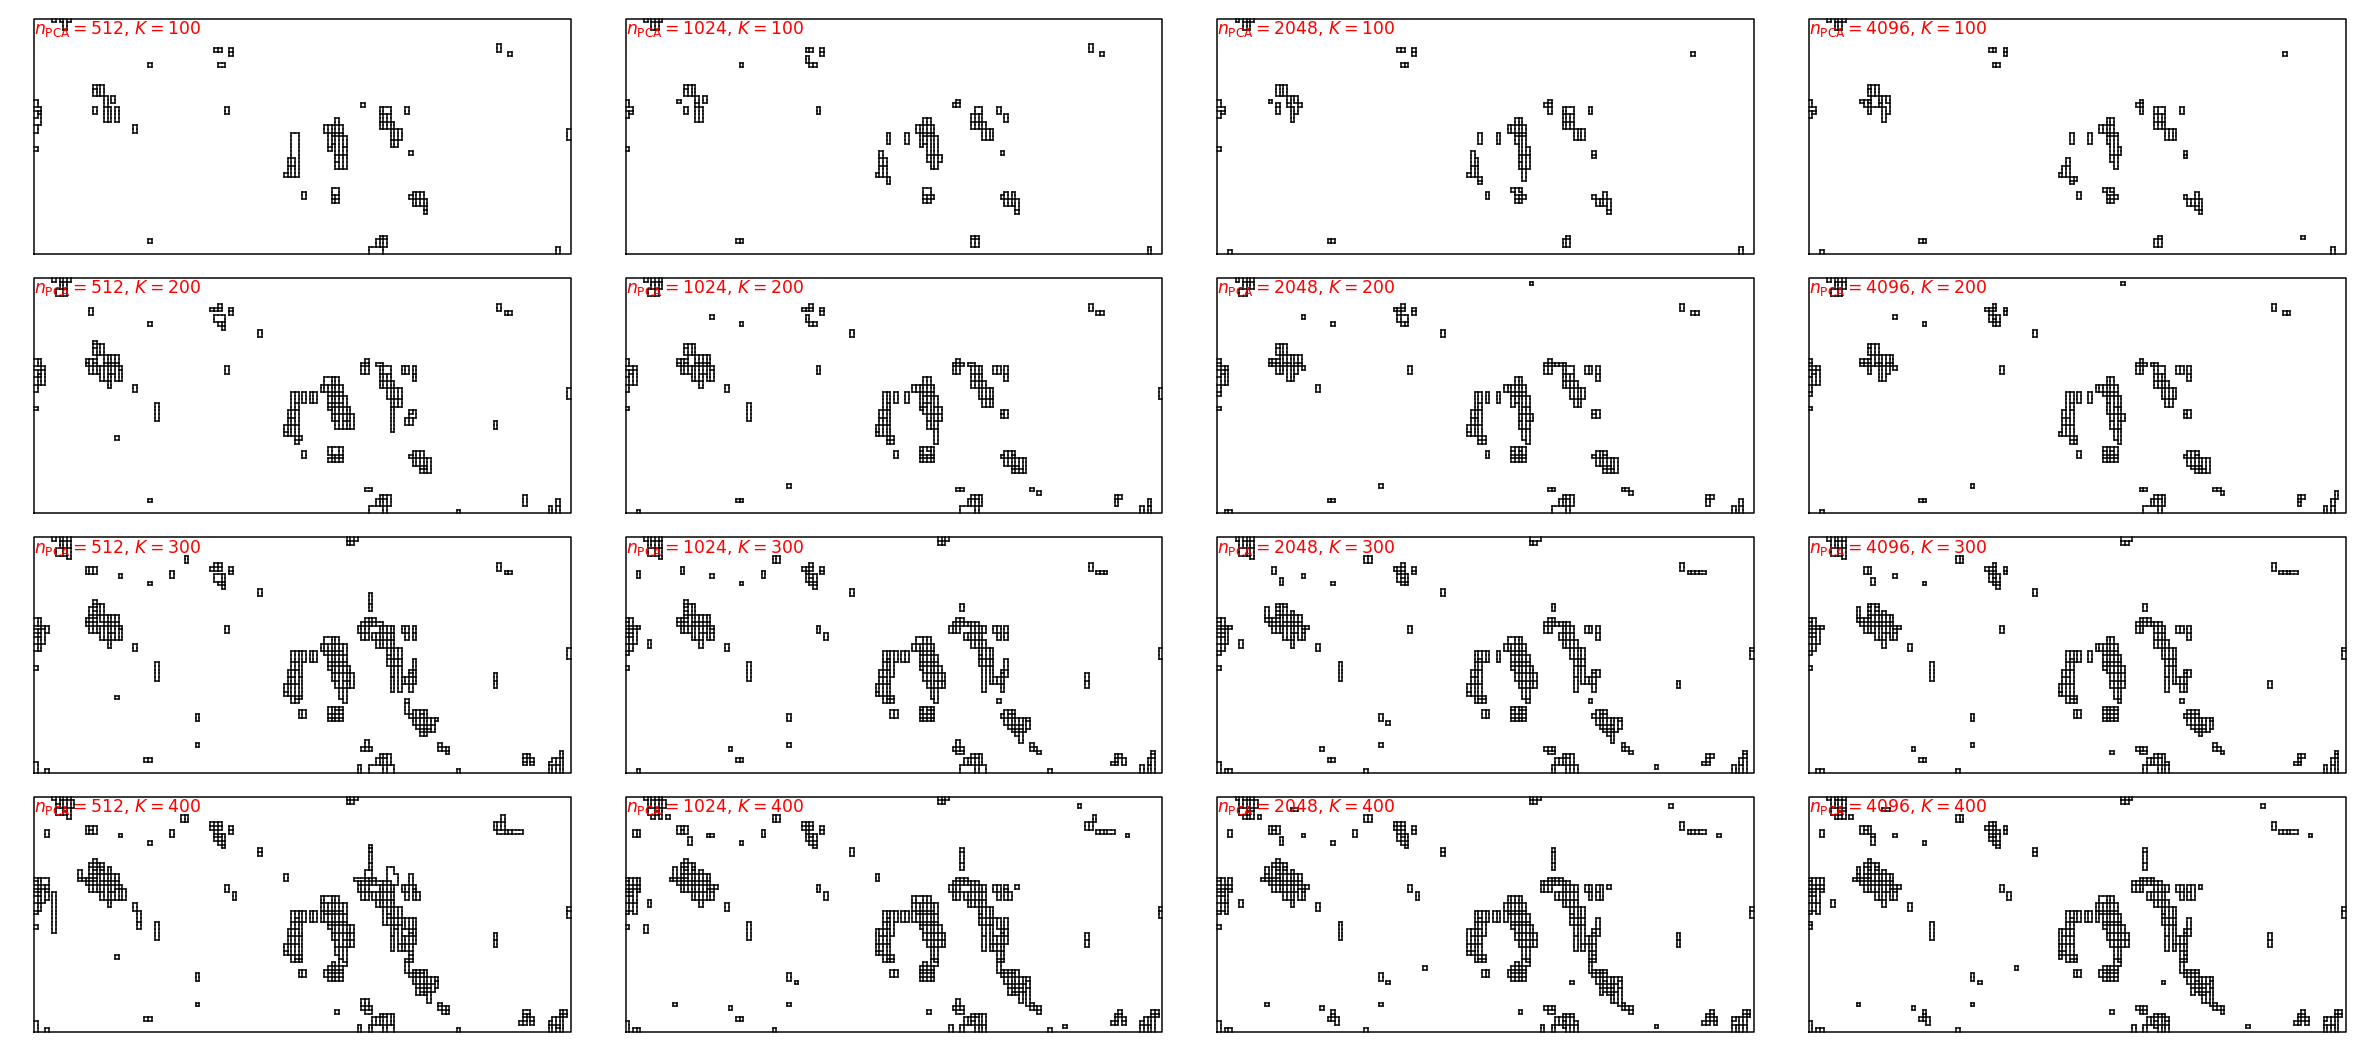

In [16]:
import sys
sys.path.append("..")
import numpy as np
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA

from scipy import fft


import lauetools.LaueTools.IOimagefile as IOimage

#from libtiff import TIFF

from sklearn import cluster
from sklearn.feature_extraction.image import grid_to_graph

from sklearn import metrics



def draw(ax,labels):
    nx,ny=labels.shape
    ax.plot([0,nx,nx,0,0],[0,0,ny,ny,0],'k')
    ax.set_aspect('equal')
    for i in range(nx):
        for j in range(ny-1):
            if labels[i,j]!=labels[i,j+1]:
                ax.plot([i,i+1],[j+1,j+1],'k')
    for i in range(nx-1):
        for j in range(ny):
            if labels[i,j]!=labels[i+1,j]:
                ax.plot([i+1,i+1],[j,j+1],'k')
    return None

#import matplotlib.gridspec as gridspec




nx,ny=64,146
ratio=ny/nx
connectivity = grid_to_graph(n_x=nx, n_y=ny)




#FA_spatial=np.load('0-64-60-124/spatial_features.npy')
FA_spatial=np.load('full_spatial_features.npy')

fig = plt.figure(constrained_layout=False,figsize=(12,12))
gs = fig.add_gridspec(nrows=4, ncols=4, left=0, right=1.2*ratio,bottom=0,top=1.2, wspace=0.002,hspace=0.002)

ns_pca=(512,1024,2048,4096)
ns_cluster=(100,200,300,400)

for i in range(4):
    pca = PCA(n_components=ns_pca[i], svd_solver='randomized')
    pca_features=pca.fit_transform(FA_spatial)#components_
    for j in range(4):
        ward = cluster.AgglomerativeClustering(n_clusters=ns_cluster[j], connectivity=connectivity, linkage='single',affinity='manhattan').fit(pca_features)
        labels = ward.labels_
        labels=labels.reshape((nx,ny))
        labels=np.flip(labels.T,1)
        ax=fig.add_subplot(gs[j,i])
        draw(ax,labels)
        #if j==0:
        #    ax.set_title("$n_{\mathrm{PCA}}=%i$"%ns_pca[i],fontsize='xx-large')
        #if i==0:
        #    ax.set_ylabel("$K=%i$"%ns_cluster[j],fontsize='xx-large')
        ax.axis('off')
        ax.text(0,64,"$n_{\mathrm{PCA}}=$%i, $K=$%i"%(ns_pca[i],ns_cluster[j]),size='xx-large',verticalalignment='top',color='red')
#plt.savefig('fig9.tif',format='tif',bbox_inches ='tight')